Billy and overall documentation 
Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.


Rajesh
Data Understanding (80 points total)
Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.






Rajesh
Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

Sean
Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 

Sean
Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

Sean/Andrew/Rajesh
Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

Andrew
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

Andrew
Are there other features that could be added to the data or created from existing features? Which ones?

Andrew
You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np


In [2]:
raw_data_url = 'https://raw.githubusercontent.com/andrewmejia600/MSDS7331/master/RAW_DATA/adult.data'

In [3]:
raw_census_95_data_names = ['age', 'workclass', 'fnlwght', 'education', 'education_num_yr', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'cap_gain', 'cap_loss', 'hours_per_week', 'native_country', 'annual_income']

In [4]:
raw_census_95_data = pd.read_csv(raw_data_url, names = raw_census_95_data_names)

In [5]:
raw_census_95_data.head(n=5)

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
raw_census_95_data.describe()

,age,fnlwght,education_num_yr,cap_gain,cap_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
raw_census_95_data.dtypes

age                  int64
workclass           object
fnlwght              int64
education           object
education_num_yr     int64
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
cap_gain             int64
cap_loss             int64
hours_per_week       int64
native_country      object
annual_income       object
dtype: object

In [8]:
raw_census_95_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwght           32561 non-null  int64 
 3   education         32561 non-null  object
 4   education_num_yr  32561 non-null  int64 
 5   marital_status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  cap_gain          32561 non-null  int64 
 11  cap_loss          32561 non-null  int64 
 12  hours_per_week    32561 non-null  int64 
 13  native_country    32561 non-null  object
 14  annual_income     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html
raw_census_95_data.shape

(32561, 15)

In [10]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notna.html
raw_census_95_data[raw_census_95_data.notna()==True]

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
raw_census_95_data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
catagorical_vars = list(raw_census_95_data.select_dtypes(include='object').columns)
print(catagorical_vars)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'annual_income']


In [13]:
#We see there is a lot of white space with some of the columns 
for col in catagorical_vars: 
    raw_census_95_data[col] = raw_census_95_data[col].str.strip()
    
del(catagorical_vars[-1])
print(catagorical_vars)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [14]:
#https://docs.python.org/3.4/library/stdtypes.html#typesmapping
#https://thispointer.com/python-how-to-add-append-key-value-pairs-in-dictionary-using-dict-update/
#we see there are a fair amount of missing values in the features denoted by '?'. 
miss_cat_vars = {}
for var in catagorical_vars: 
    k,v = var,raw_census_95_data[var].unique()
    miss_cat_vars.update({k : v})
miss_cat_vars

{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
        'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
       dtype=object),
 'education': array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object),
 'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
        'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
        'Widowed'], dtype=object),
 'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
        'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
        'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
        'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
        'Priv-house-serv'], dtype=object),
 'relationship': array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
  

In [15]:
#We see there are not many observations with native country of "Hong" and "South" we should consider removing these observations as we cannot group to a continent
pd.crosstab(raw_census_95_data.native_country.isin(['Hong', 'South']), raw_census_95_data.annual_income)

annual_income,<=50K,>50K
native_country,,
False,24642,7819
True,78,22


Let's remove the "Hong" and "South" obersvations as we do not know definatively which countries these are

In [16]:
raw_census_95_data = raw_census_95_data[~raw_census_95_data.native_country.isin(['Hong', 'South'])]

In [17]:
miss_cat_vars = {}
for var in catagorical_vars: 
    k,v = var,raw_census_95_data[var].unique()
    miss_cat_vars.update({k : v})
miss_cat_vars

{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
        'Local-gov', 'Self-emp-inc', '?', 'Without-pay', 'Never-worked'],
       dtype=object),
 'education': array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object),
 'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
        'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
        'Widowed'], dtype=object),
 'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
        'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
        'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
        'Tech-support', 'Protective-serv', '?', 'Armed-Forces',
        'Priv-house-serv'], dtype=object),
 'relationship': array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
  

We see there are many countries to the levels, lets map the origin countries to a continent variable 

In [18]:
continent_dict = {'United-States': 'United States', 'Cuba': 'Carib', 'Jamaica' : 'Carib', 'India' : 'Asia', \
                  'Mexico': 'North America', 'Puerto-Rico' : 'North America', 'Honduras' : 'Central America',\
                 'England' : 'Europe', 'Canada' : 'North America', 'Germany' : 'Europe', 'Cambodia': 'Asia',\
                 'Thailand' : 'Asia', 'Ecuador' : 'South America', 'Loas' : 'Asia', 'Taiwan': 'Asia',\
                 'Haiti' : 'Carib', 'Portugual' : 'Europe', 'Dominican-Republic' : 'Carib', 'El-Salvador': 'South America',\
                 'France': 'Europe', 'Guatemala' : 'Central America', 'China' : 'Asia', 'Japan' : 'Asia', 'Yugoslavia' : 'Europe',\
                 'Peru' : 'Central America', 'Outlying-US(Guam-USVI-etc)' : 'United States', 'Scotland' : 'Europe', \
                 'Trinadad&Tobago': 'Carib', 'Greece' : 'Europe', 'Nicaragua' : 'South America', 'Vietnam' : 'Asia', \
                 'Ireland' : 'Europe', 'Hungary': 'Europe', 'Holand-Netherlands' : 'Europe'}

In [19]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html
raw_census_95_data['origin_descent'] = raw_census_95_data.native_country.map(continent_dict)
raw_census_95_data.head(n=5)

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income,origin_descent
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,United States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,United States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,United States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,United States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Carib


We see there are still too many levels with the continent approach. Now let's encode the origin_descent to United States = 1 and all others = 0 and call this feature origin_descent_us. 

In [20]:
#https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.Series.apply.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html
raw_census_95_data['origin_descent_us'] = raw_census_95_data.origin_descent.apply(lambda x: 1 if x == 'United States' else 0)
raw_census_95_data['origin_descent_us'] = raw_census_95_data.origin_descent_us.astype('object')
raw_census_95_data.head(n=5)

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income,origin_descent,origin_descent_us
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,United States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,United States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,United States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,United States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Carib,0


Let's make a few new catagorical features to simplify and compare the stratification. 
We know that income_outcome is our target feature and will want to use it later in the pipeline for whether someone makes 50K or more than 50K. We shall code <= 50K to 0 and more than 50K to 1, and call this new target income_outcome. 

We also would like to know who is a full time employee versus a part time employee, we will code those who work less more than 40 hours as 'FT' and those who do not as 'PT', and call it level_of_empoy. 

We also will convert the numeric ages in the following fashion. 0-17 will be a child, 18-65 is an adult and 66 and older is a senior, and call it age_range. 

We will make a new feature called education level where those with a bachelors is considered a college grad, those with a masters or a Doctorate is a PGRAD for post graduate, HS-grad is HSGRAD, and those from 9th grade to 12th grade are HS for highschool and those below all fall under PRIM for primary education. ASC is for those with some vocational or associates degree. 



In [21]:
annual_income_dict = {'<=50K' : 0, '>50K' : 1}
raw_census_95_data['income_outcome'] = raw_census_95_data.annual_income.map(annual_income_dict)
raw_census_95_data['income_outcome'] = raw_census_95_data.income_outcome.astype('object')

In [22]:
raw_census_95_data['level_of_employ'] = raw_census_95_data.hours_per_week.apply(lambda x: 'FT' if x >= 40 else 'PT')

In [23]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
raw_census_95_data['age_range'] = pd.cut(raw_census_95_data.age, [0,17,65,1e6],3,labels=['child','adult','senior'])
raw_census_95_data['age_range'] = raw_census_95_data.age_range.astype('object')

This is rather interesting, there are 44 records classified as Preschool for education, but hold jobs in workclass that are unexpected. There is no reason to exclude these records, as it is not unreasonable for these individuals to have had alternative schooling. 

In [24]:
raw_census_95_data[raw_census_95_data.education == 'Preschool']

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income,origin_descent,origin_descent_us,income_outcome,level_of_employ,age_range
224,53,Local-gov,140359,Preschool,1,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,35,United-States,<=50K,United States,1,0,PT,adult
932,51,Local-gov,241843,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K,United States,1,0,FT,adult
2884,71,Private,235079,Preschool,1,Widowed,Craft-repair,Unmarried,Black,Male,0,0,10,United-States,<=50K,United States,1,0,PT,senior
2946,31,Private,452405,Preschool,1,Never-married,Other-service,Other-relative,White,Female,0,0,35,Mexico,<=50K,North America,0,0,PT,adult
3446,33,Private,239781,Preschool,1,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,Mexico,<=50K,North America,0,0,FT,adult
3592,39,?,362685,Preschool,1,Widowed,?,Not-in-family,White,Female,0,0,20,El-Salvador,<=50K,South America,0,0,PT,adult
4107,52,Private,416129,Preschool,1,Married-civ-spouse,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador,<=50K,South America,0,0,FT,adult
6433,27,Private,211032,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,41310,0,24,Mexico,<=50K,North America,0,0,PT,adult
6864,54,Private,286989,Preschool,1,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K,United States,1,0,FT,adult
7070,30,Private,193598,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,Mexico,<=50K,North America,0,0,FT,adult


In [25]:
education_level_dict = {'Bachelors' : 'CGRAD', 'HS-grad' : 'HSGRAD', '11th' : 'HS', 'Masters' : 'PGRAD', '9th': 'HS', 'Some-college' : 'SC',
        'Assoc-acdm' : 'ASC', 'Assoc-voc' : 'ASC', '7th-8th' : 'PRIM', 'Doctorate' : 'PGRAD', 'Prof-school' : 'ASC',
        '5th-6th' : 'PRIM', '10th' : 'HS', '1st-4th' : 'PRIM', 'Preschool' : 'PRIM', '12th' : 'HS'}
raw_census_95_data['education_level'] = raw_census_95_data.education.map(education_level_dict)

In [26]:
raw_census_95_data.dtypes

age                   int64
workclass            object
fnlwght               int64
education            object
education_num_yr      int64
marital_status       object
occupation           object
relationship         object
race                 object
sex                  object
cap_gain              int64
cap_loss              int64
hours_per_week        int64
native_country       object
annual_income        object
origin_descent       object
origin_descent_us    object
income_outcome       object
level_of_employ      object
age_range            object
education_level      object
dtype: object

In [27]:
catagorical_vars = list(raw_census_95_data.select_dtypes(include='object').columns)
catagorical_vars.remove('annual_income')
catagorical_vars.remove('income_outcome')
print(catagorical_vars)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'origin_descent', 'origin_descent_us', 'level_of_employ', 'age_range', 'education_level']


We see we are missing values in workclass, occupation and native country. 

In [28]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
pd.crosstab(raw_census_95_data.workclass, raw_census_95_data.annual_income)

annual_income,<=50K,>50K
workclass,,
?,1637,189
Federal-gov,589,370
Local-gov,1476,616
Never-worked,7,0
Private,17685,4952
Self-emp-inc,489,620
Self-emp-not-inc,1802,719
State-gov,943,353
Without-pay,14,0


In [29]:
pd.crosstab(raw_census_95_data.occupation, raw_census_95_data.annual_income)

annual_income,<=50K,>50K
occupation,,
?,1644,189
Adm-clerical,3258,506
Armed-Forces,8,1
Craft-repair,3160,927
Exec-managerial,2089,1962
Farming-fishing,878,115
Handlers-cleaners,1282,86
Machine-op-inspct,1748,250
Other-service,3148,136


In [30]:
pd.crosstab(raw_census_95_data.native_country, raw_census_95_data.annual_income)

annual_income,<=50K,>50K
native_country,,
?,437,146
Cambodia,12,7
Canada,82,39
China,55,20
Columbia,57,2
Cuba,70,25
Dominican-Republic,68,2
Ecuador,24,4
El-Salvador,97,9


As we are not sure of the "?" values. We dicussed using an imputation of the mode for workclass, occupation and native country, but looking at the modes, we see the most highly occuring values for workclass are private, United-States for country of origin and Prof-specialty. When we look at the proportion of <=50K and >50K, we see the propotions do not match to the mode of each class. 

For example. The proportion of <=50K is 90% and >50K is 10% in the "?" class of the workclass feature, vs 78% <50K and 22% for >50K in the mode of workclass, Private. 

We also see a similiar occurance with occupation, where the proportion of <=50K and >50K is 90% and 10% for the "?" class while the mode, "Prof-Specialty" is 55% for <= 50K and 45% for >50K. 

The only one that is relatively close is native country of "United States" and the "?" class at both classes being roughly even at 75% for <= 50K and 25% for >50K. 

We also see these missing observations comprise of just under 2400 observations. This makes up less than 10% of the entire dataset, excluding these observations is relatively low risk. 

For these reasons we will exclude the "?" labels from further analysis. 

In [31]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
raw_census_95_data[(raw_census_95_data.workclass != '?') & (raw_census_95_data.occupation == '?')].shape

(7, 21)

In [32]:
raw_census_95_data[(raw_census_95_data.workclass == '?') & (raw_census_95_data.occupation == '?')].shape

(1826, 21)

In [33]:
raw_census_95_data[(raw_census_95_data.workclass == '?') & (raw_census_95_data.occupation != '?')]

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,...,cap_loss,hours_per_week,native_country,annual_income,origin_descent,origin_descent_us,income_outcome,level_of_employ,age_range,education_level


In [34]:
raw_census_95_data[(raw_census_95_data.native_country == '?')].shape

(583, 21)

In [35]:
excluded_data = raw_census_95_data[~((raw_census_95_data.workclass != '?') & (raw_census_95_data.native_country != '?') & (raw_census_95_data.occupation != '?'))]
excluded_data.shape

(2389, 21)

In [36]:
print(raw_census_95_data.workclass.mode(),\
raw_census_95_data.native_country.mode(),\
raw_census_95_data.occupation.mode()
     )

0    Private
dtype: object 0    United-States
dtype: object 0    Prof-specialty
dtype: object


In [37]:
#https://stackoverflow.com/questions/21247203/how-to-make-a-pandas-crosstab-with-percentages
pd.crosstab(raw_census_95_data.annual_income,raw_census_95_data.workclass).apply(lambda x: x/x.sum(), axis=1)

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
annual_income,,,,,,,,,
<=50K,0.066431,0.023902,0.059898,0.000284,0.717677,0.019844,0.073127,0.038268,0.000568
>50K,0.024172,0.047321,0.078782,0.000000,0.633329,0.079294,0.091955,0.045146,0.000000


In [38]:
pd.crosstab(raw_census_95_data.annual_income,raw_census_95_data.native_country).apply(lambda x: x/x.sum(), axis=1)

native_country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Poland,Portugal,Puerto-Rico,Scotland,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
annual_income,,,,,,,,,,,,,,,,,,,,,
<=50K,0.017734,0.000487,0.003328,0.002232,0.002313,0.002841,0.002760,0.000974,0.003936,0.002435,...,0.001948,0.001339,0.004139,0.000365,0.001258,0.000609,0.000690,0.892744,0.002516,0.000406
>50K,0.018672,0.000895,0.004988,0.002558,0.000256,0.003197,0.000256,0.000512,0.001151,0.003837,...,0.001535,0.000512,0.001535,0.000384,0.002558,0.000384,0.000256,0.917125,0.000639,0.000767


In [39]:
pd.crosstab(raw_census_95_data.annual_income,raw_census_95_data.occupation).apply(lambda x: x/x.sum(), axis=1)

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
annual_income,,,,,,,,,,,,,,,
<=50K,0.066715,0.132213,0.000325,0.128236,0.084774,0.035630,0.052025,0.070936,0.127749,0.006006,0.092119,0.017775,0.107581,0.026134,0.051782
>50K,0.024172,0.064714,0.000128,0.118557,0.250927,0.014708,0.010999,0.031973,0.017394,0.000128,0.237115,0.026858,0.125208,0.036194,0.040926


In [40]:
raw_census_95_data = raw_census_95_data[((raw_census_95_data.workclass != '?') & (raw_census_95_data.native_country != '?') & (raw_census_95_data.occupation != '?'))]
raw_census_95_data.shape

(30072, 21)

In [41]:
for var in catagorical_vars:
    print(pd.crosstab(raw_census_95_data[var], raw_census_95_data.annual_income).apply(lambda x: x/x.sum(), axis = 1)) 

annual_income        <=50K      >50K
workclass                           
Federal-gov       0.613588  0.386412
Local-gov         0.705712  0.294288
Private           0.781122  0.218878
Self-emp-inc      0.439550  0.560450
Self-emp-not-inc  0.713998  0.286002
State-gov         0.730619  0.269381
Without-pay       1.000000  0.000000
annual_income     <=50K      >50K
education                        
10th           0.928049  0.071951
11th           0.943541  0.056459
12th           0.923077  0.076923
1st-4th        0.960265  0.039735
5th-6th        0.958333  0.041667
7th-8th        0.936937  0.063063
9th            0.945055  0.054945
Assoc-acdm     0.746773  0.253227
Assoc-voc      0.735994  0.264006
Bachelors      0.577720  0.422280
Doctorate      0.250000  0.750000
HS-grad        0.835660  0.164340
Masters        0.435374  0.564626
Preschool      1.000000  0.000000
Prof-school    0.251386  0.748614
Some-college   0.799670  0.200330
annual_income             <=50K      >50K
marital_statu

As we see from the above proportion tables, there does seem to be some shifts in the categorical features of who makes up to 50K and who makes more than 50K. The mosaic plots are more telling, and we can clearly see a clear shift in workclass, marital status, education_level, relationship, occupation, sex, origin_descent (whether one is from the United States or not), and level_of_employ. These plots are indicative of strong relationships showing whether someone makes 50K or less v.s. someone making more than 50K. 

What is really interesting is looking at the education_level feature, the data would suggest as a college grad your proportion of making more than 50K is almost equal to that of making 50K or less. BUt the Post grad proportion has more making greater than 50K than the proportion of making less than 50K.  The ones of note are the large proportions of some highschool and some college, where the proportion of making less than 50K is considerably higher than those making more than 50K. 

workclass


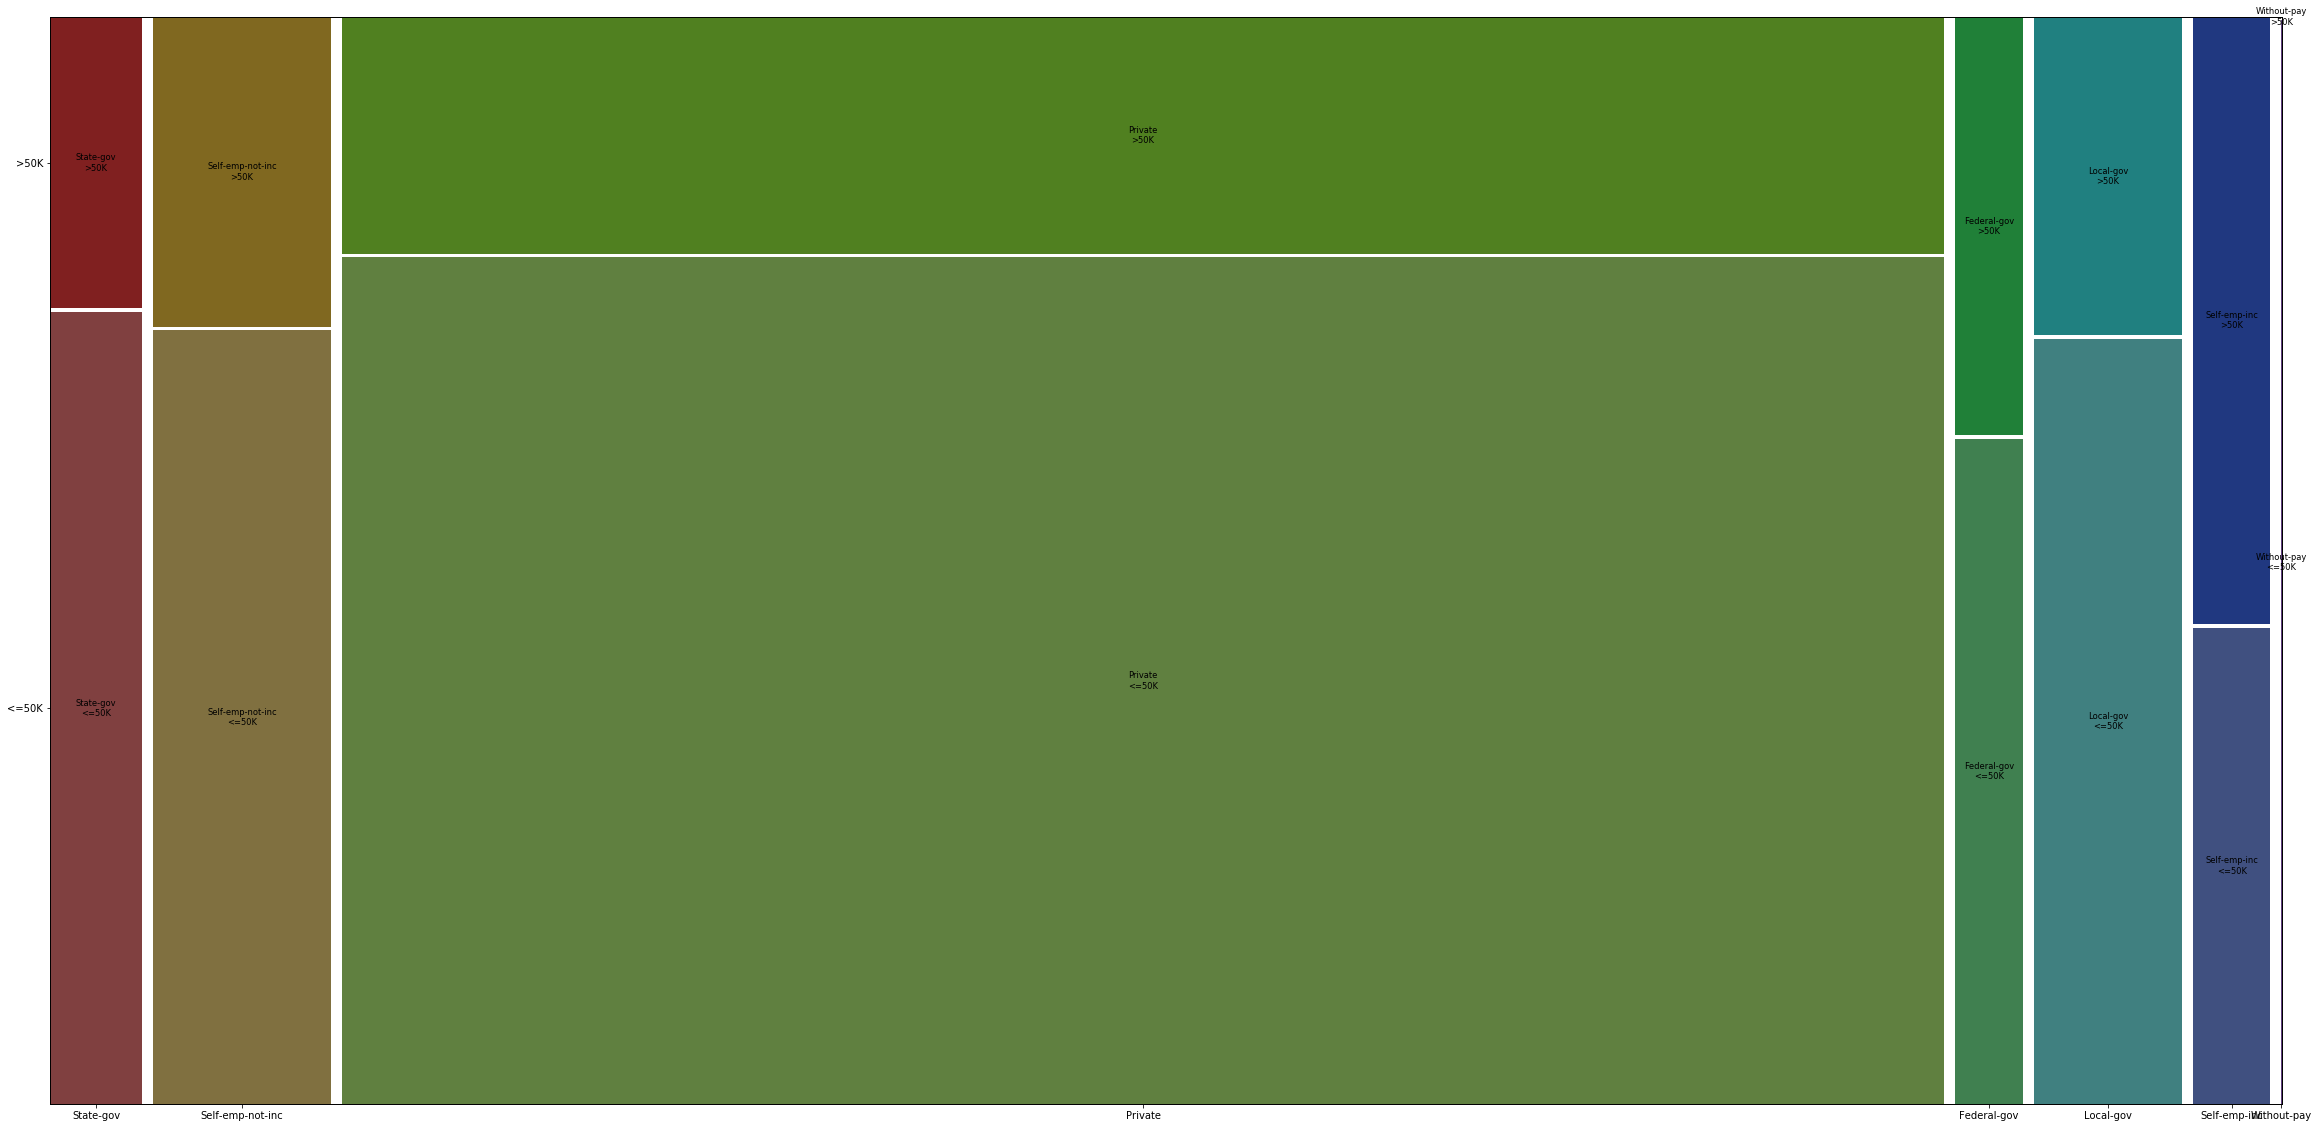

education


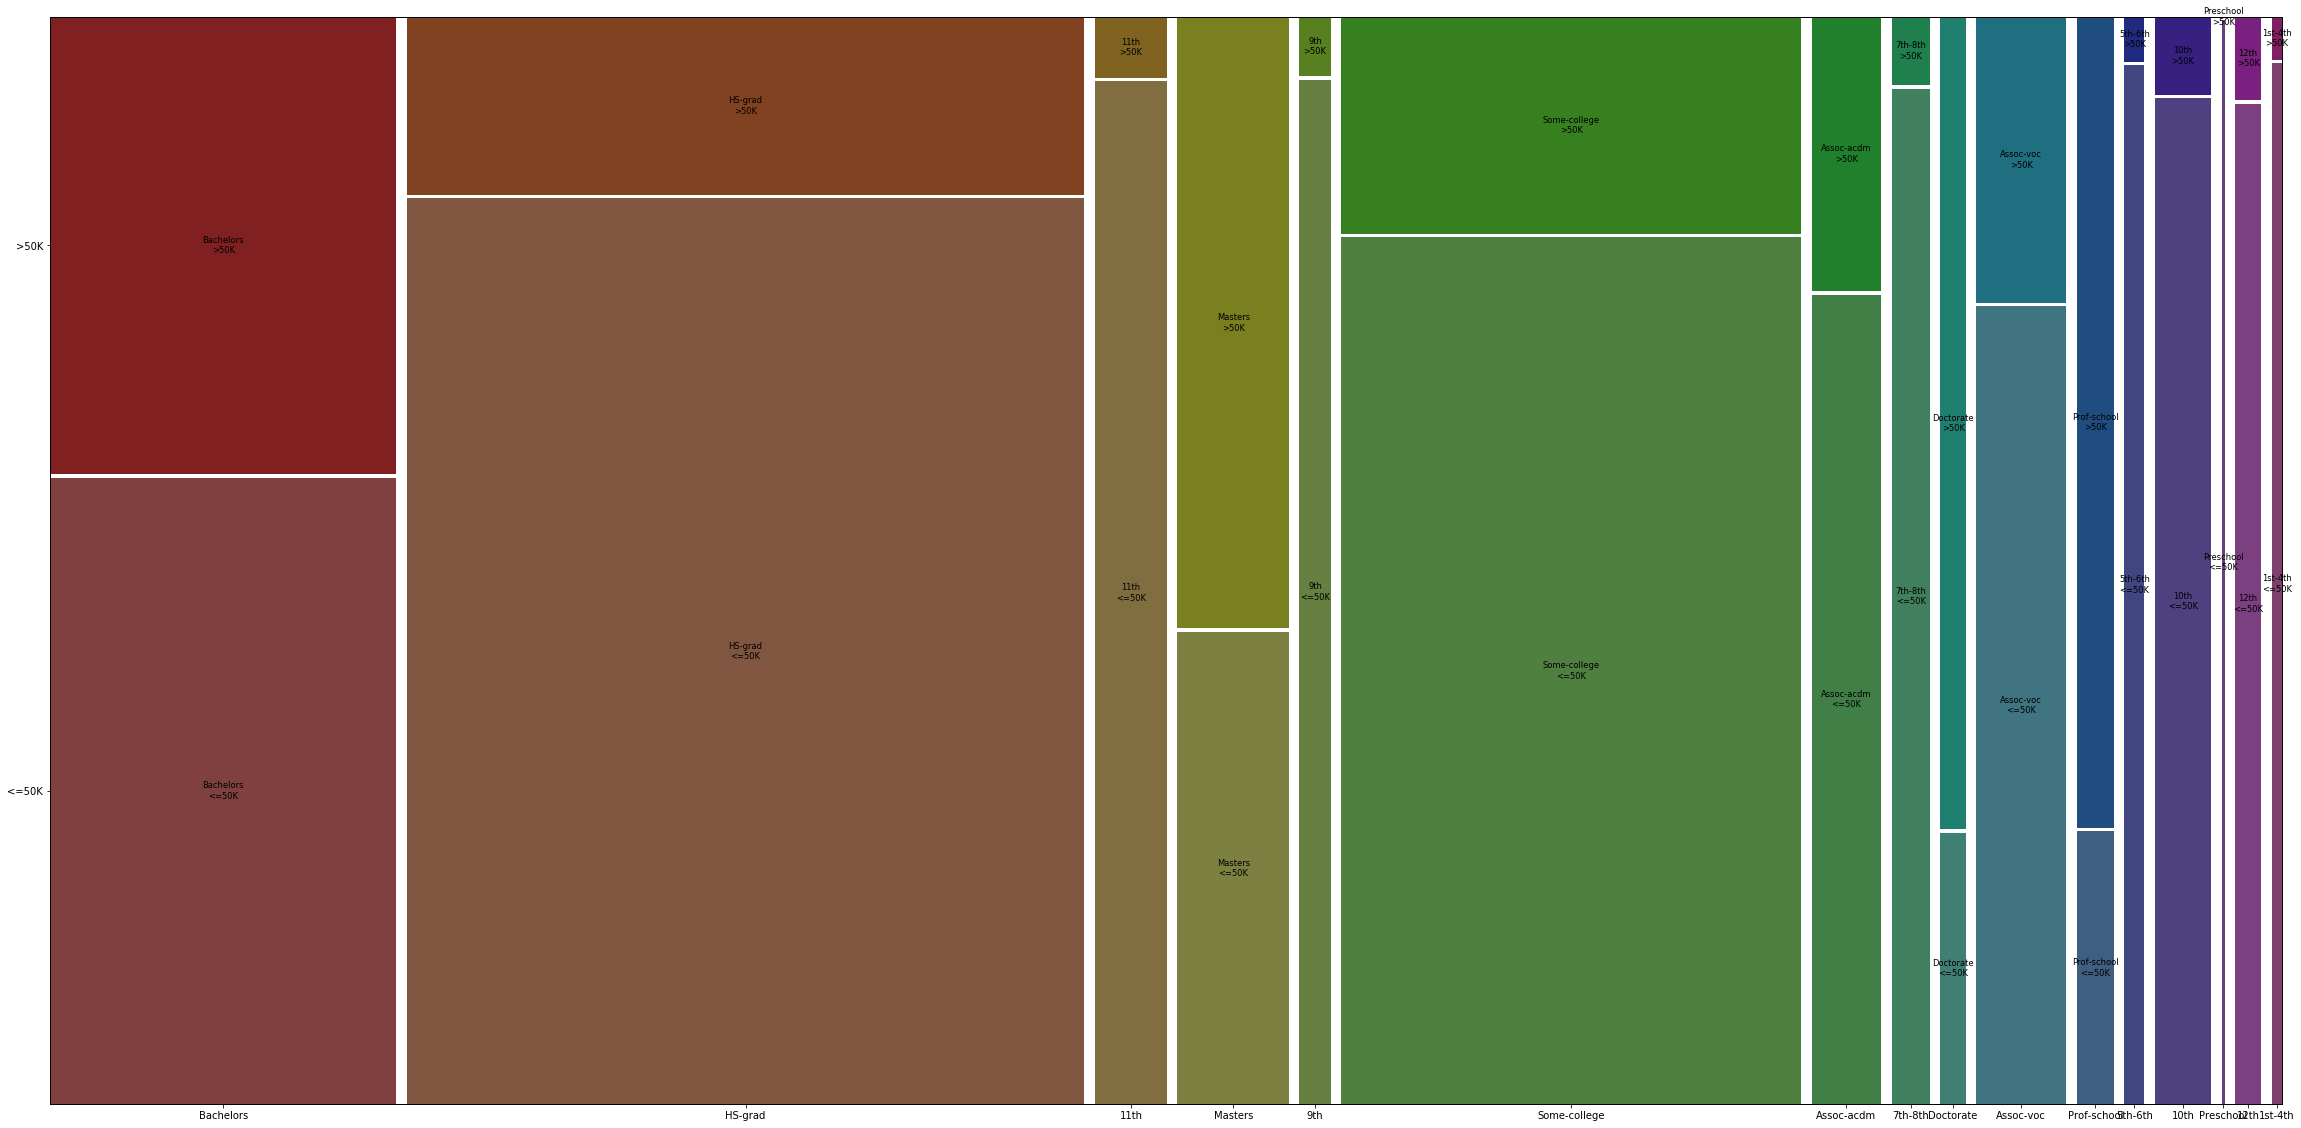

marital_status


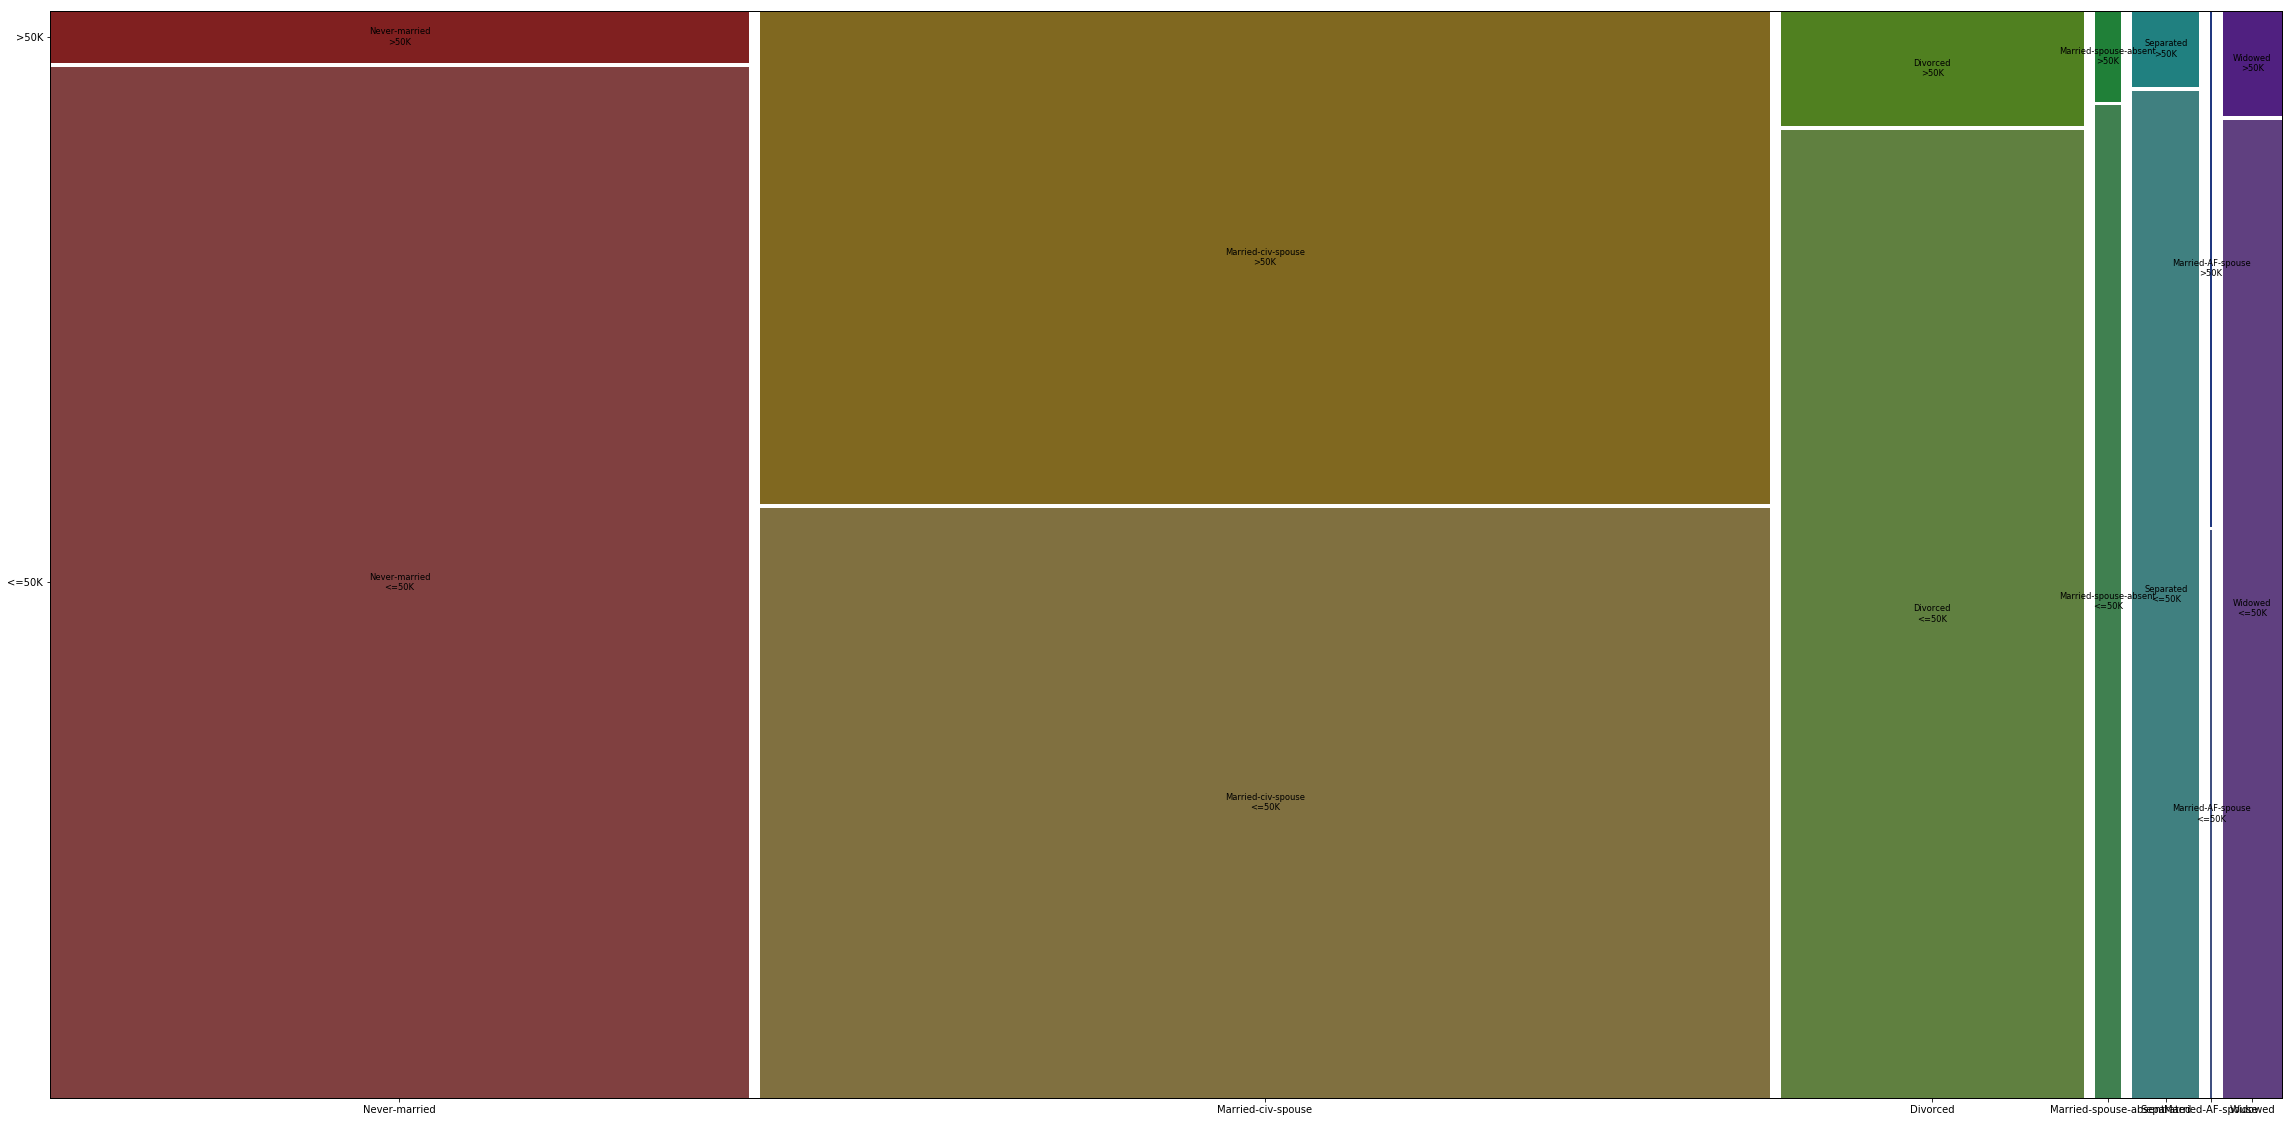

occupation


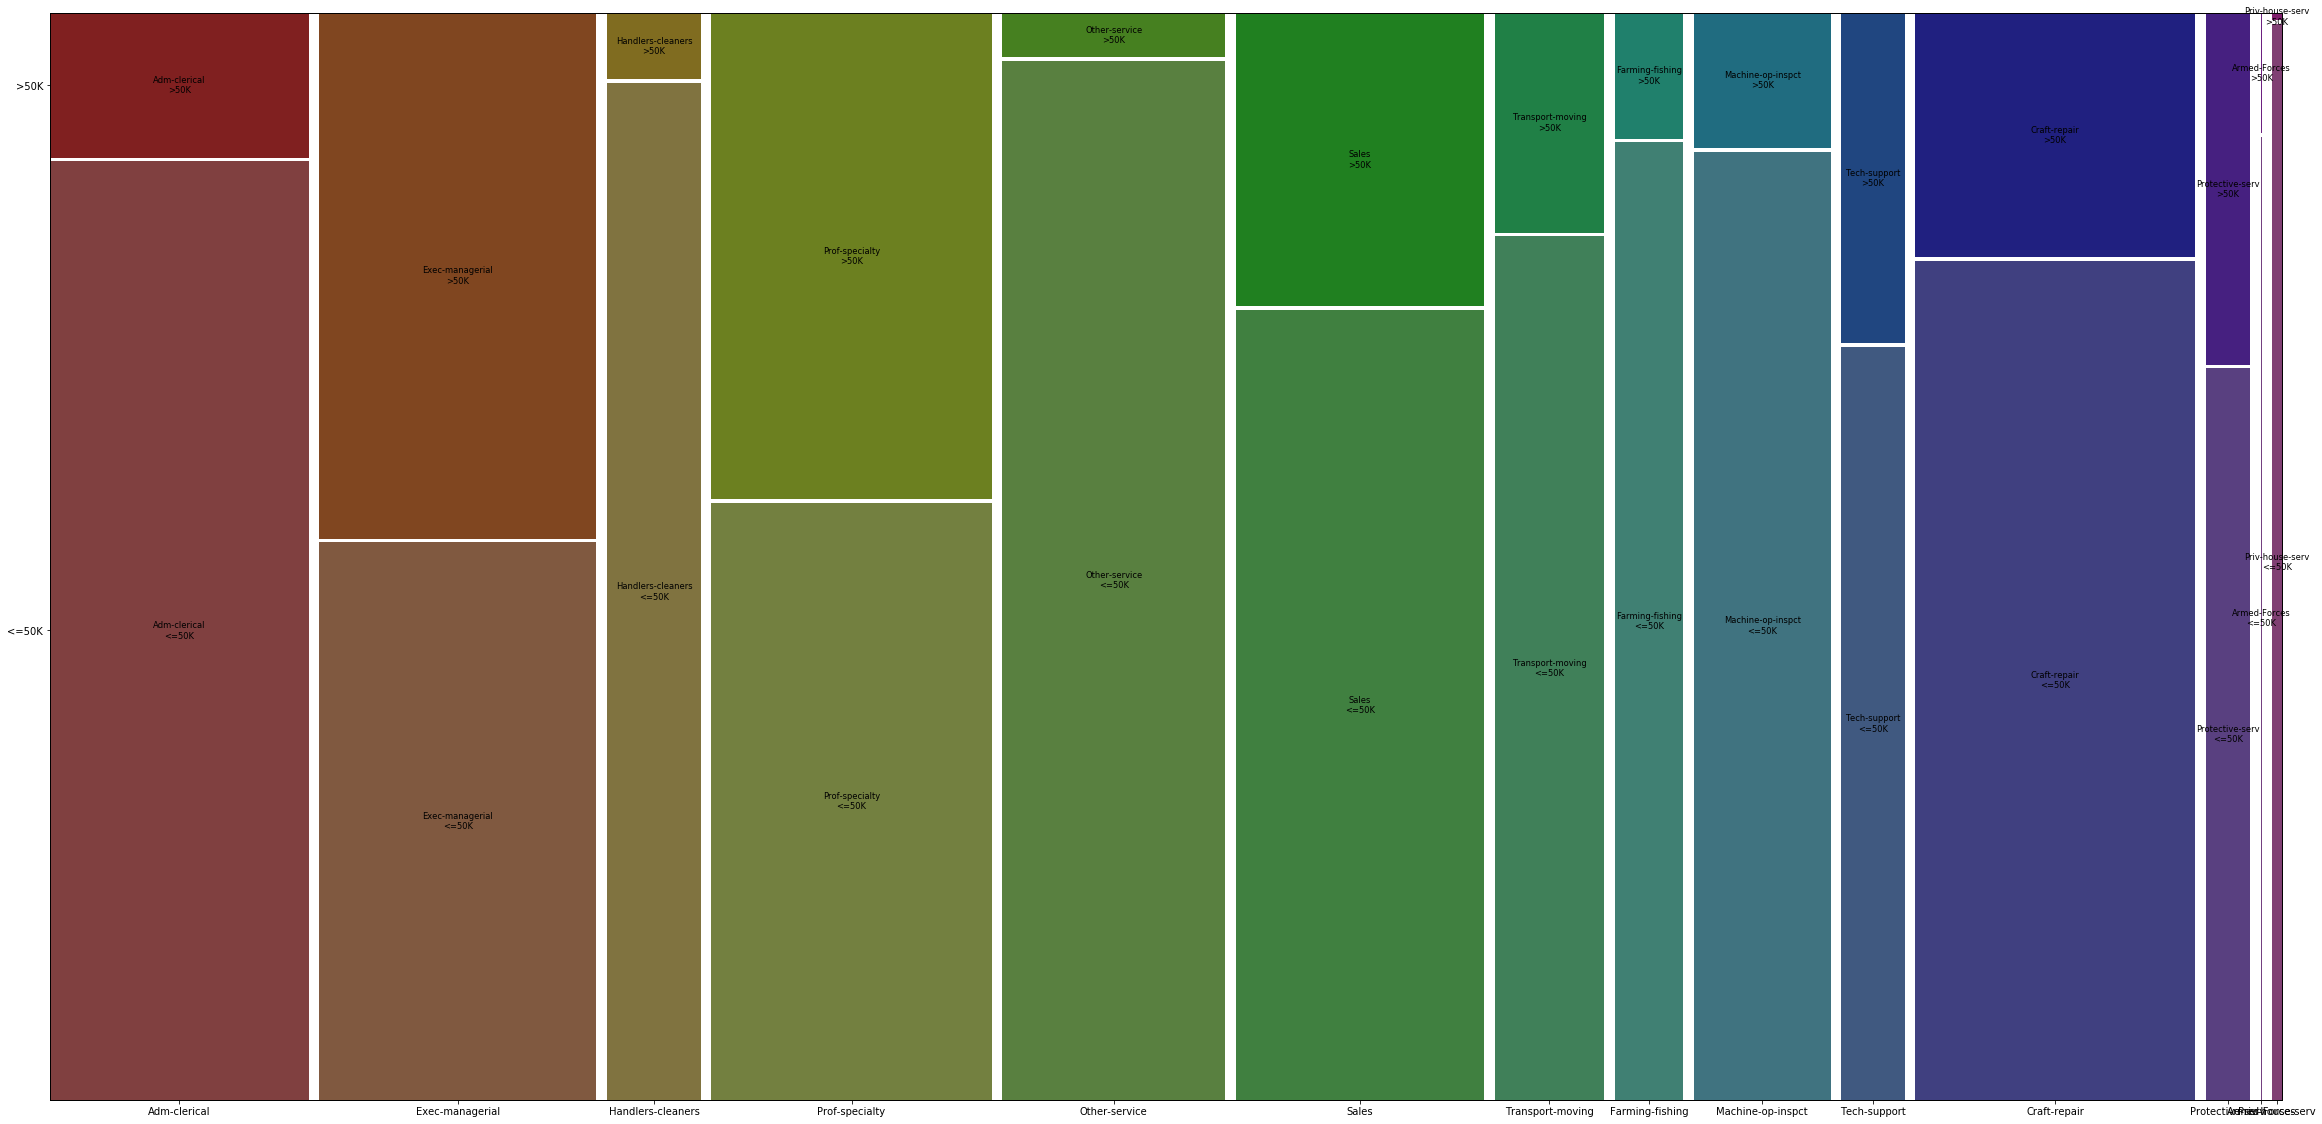

relationship


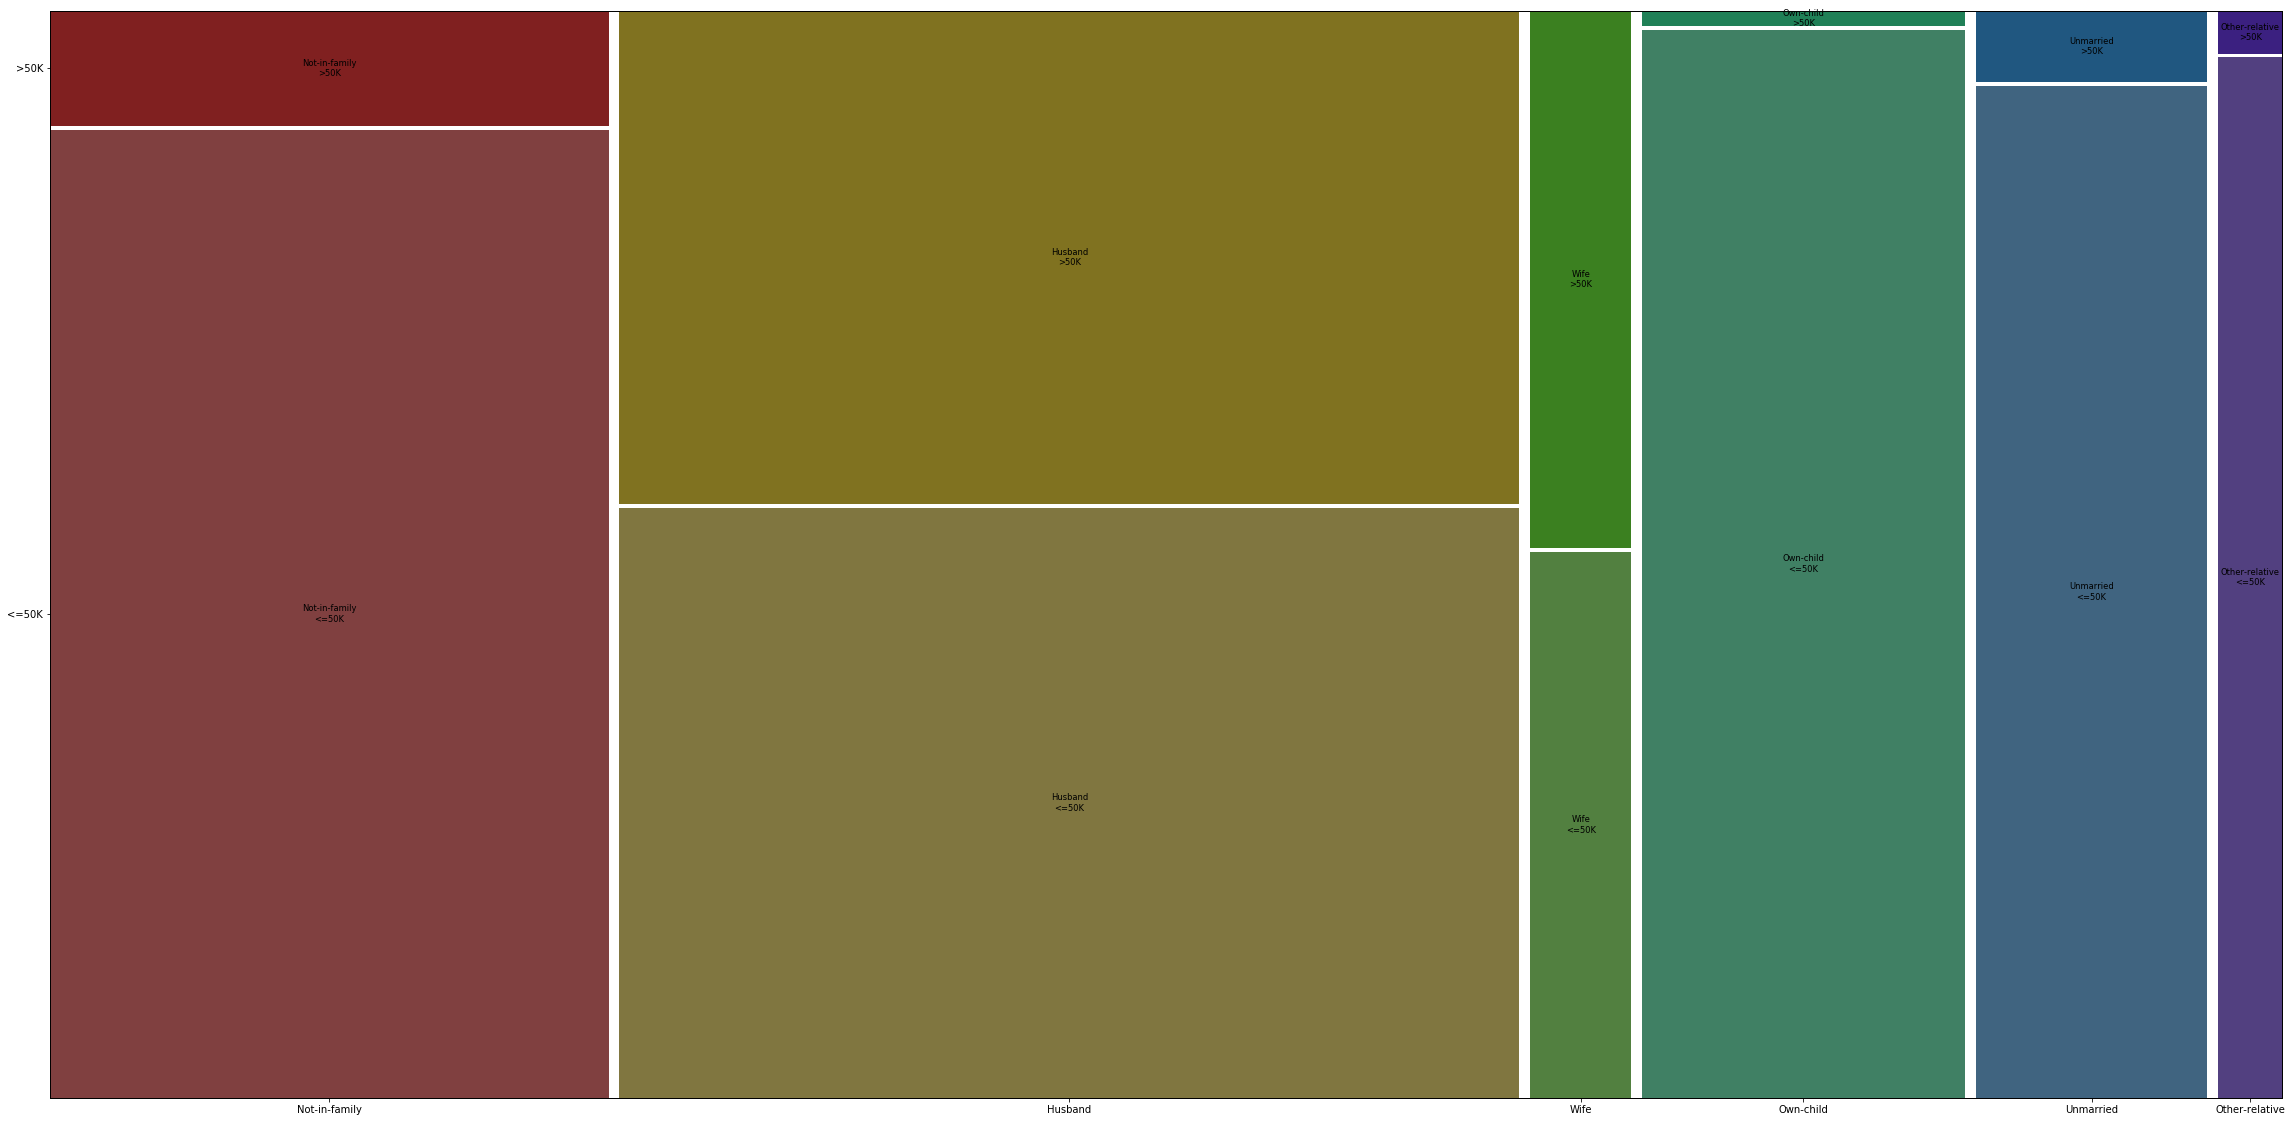

race


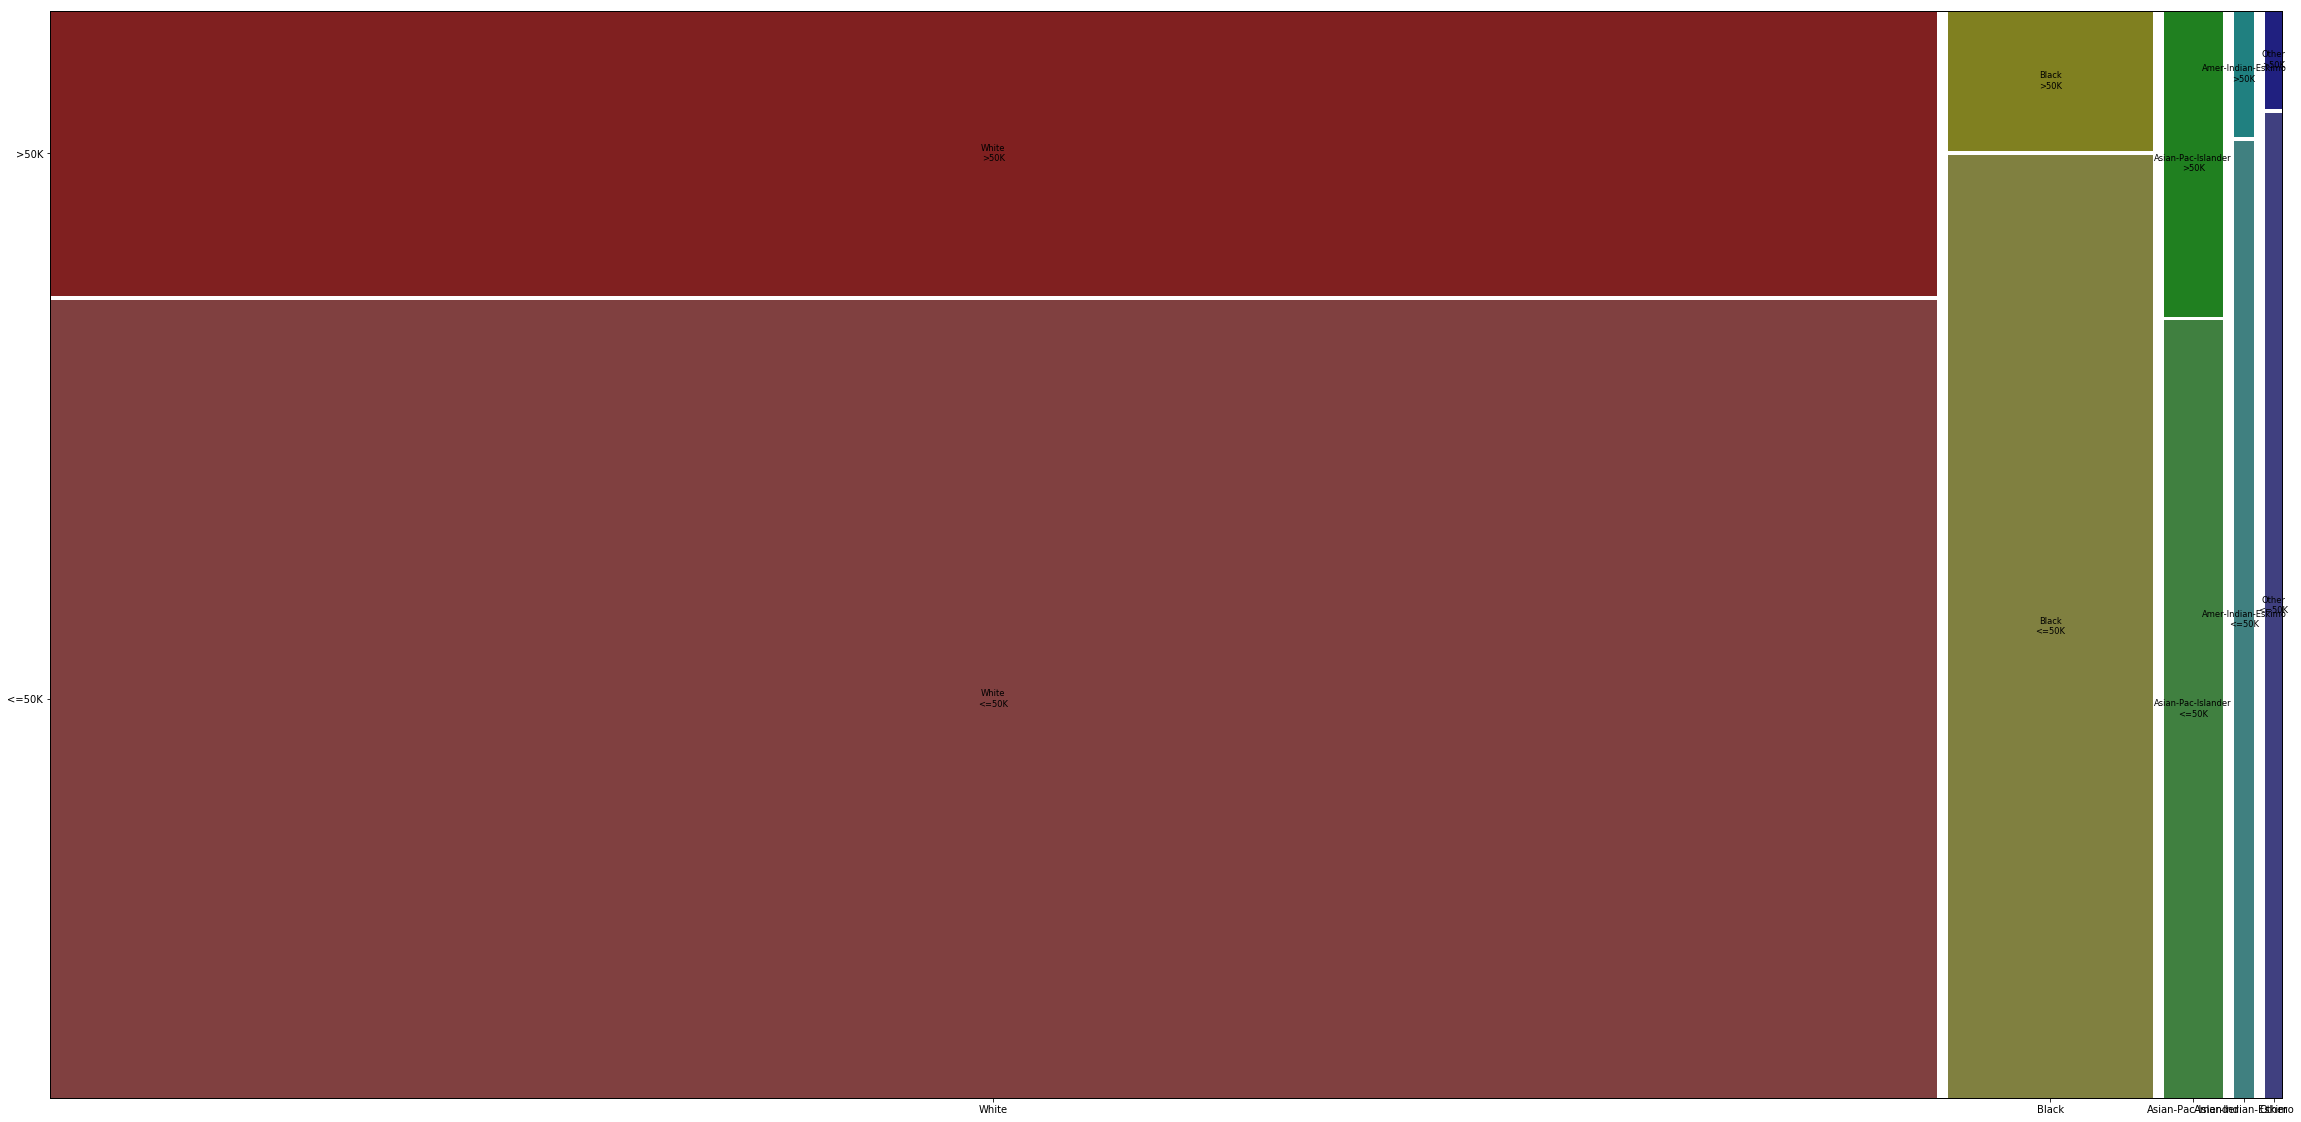

sex


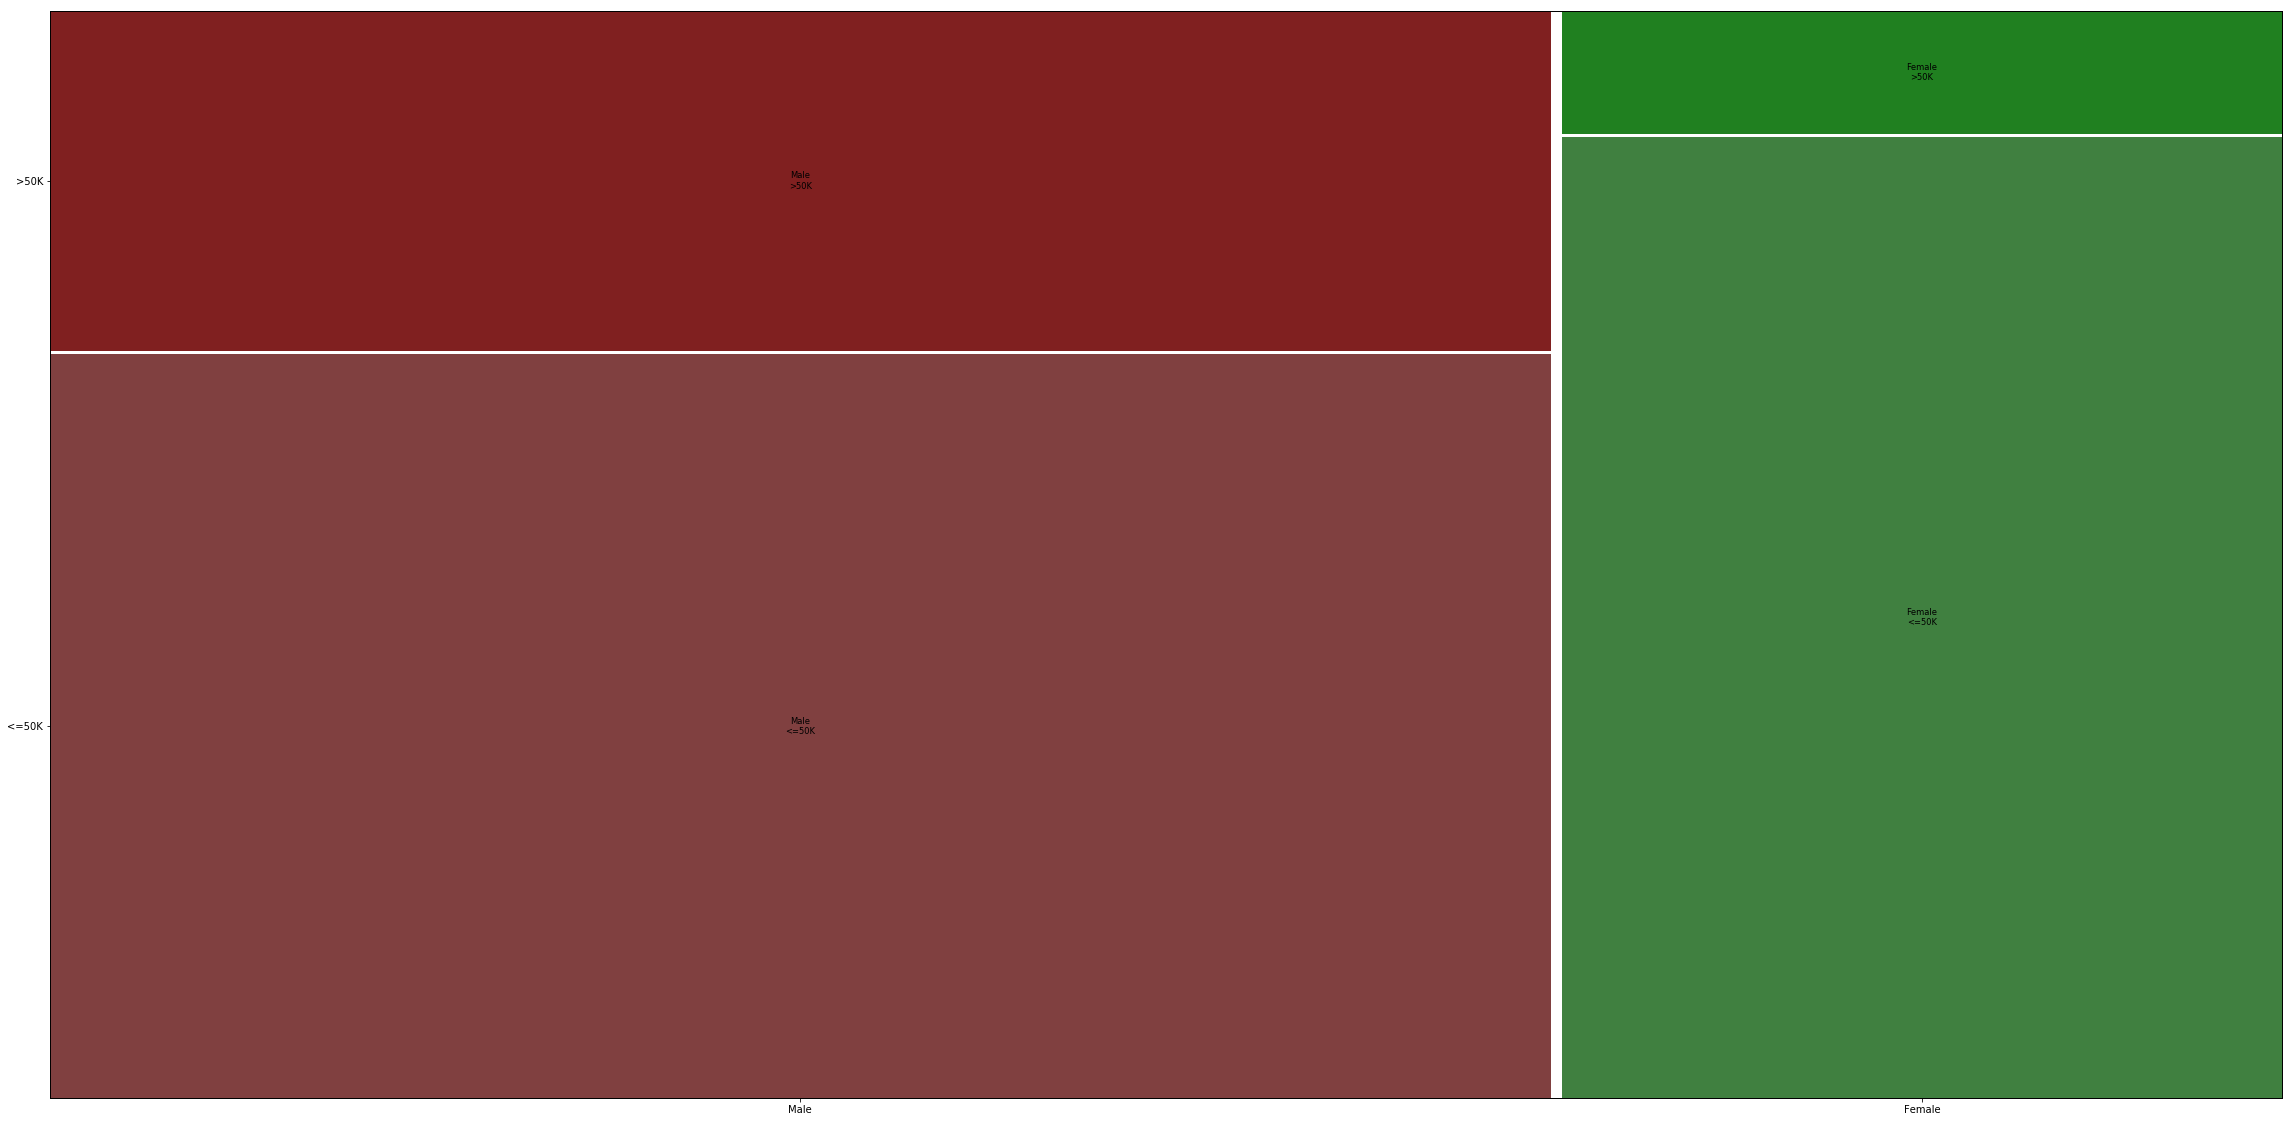

native_country


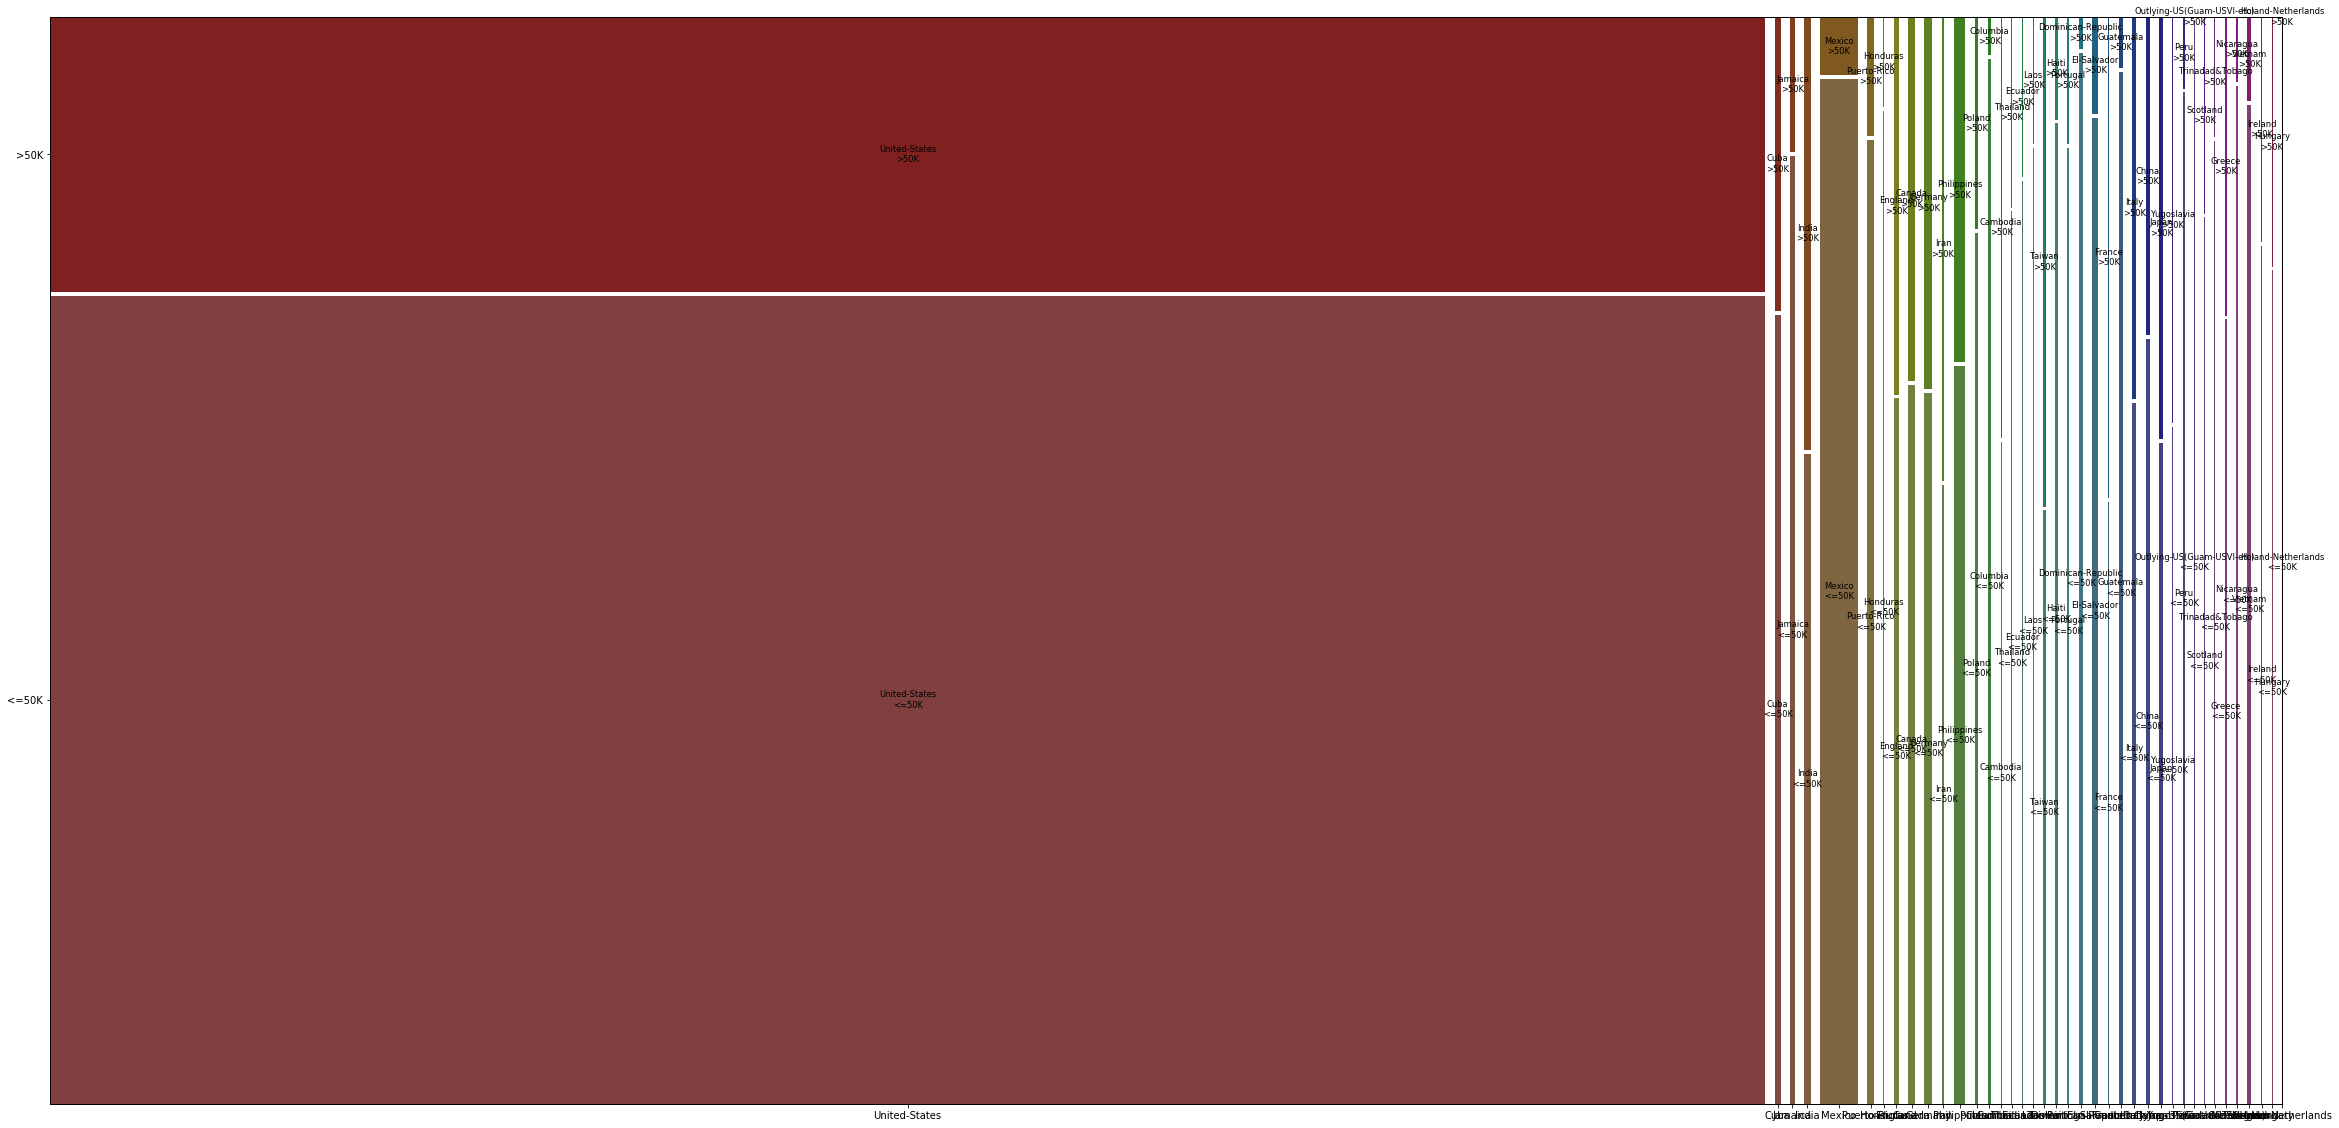

origin_descent


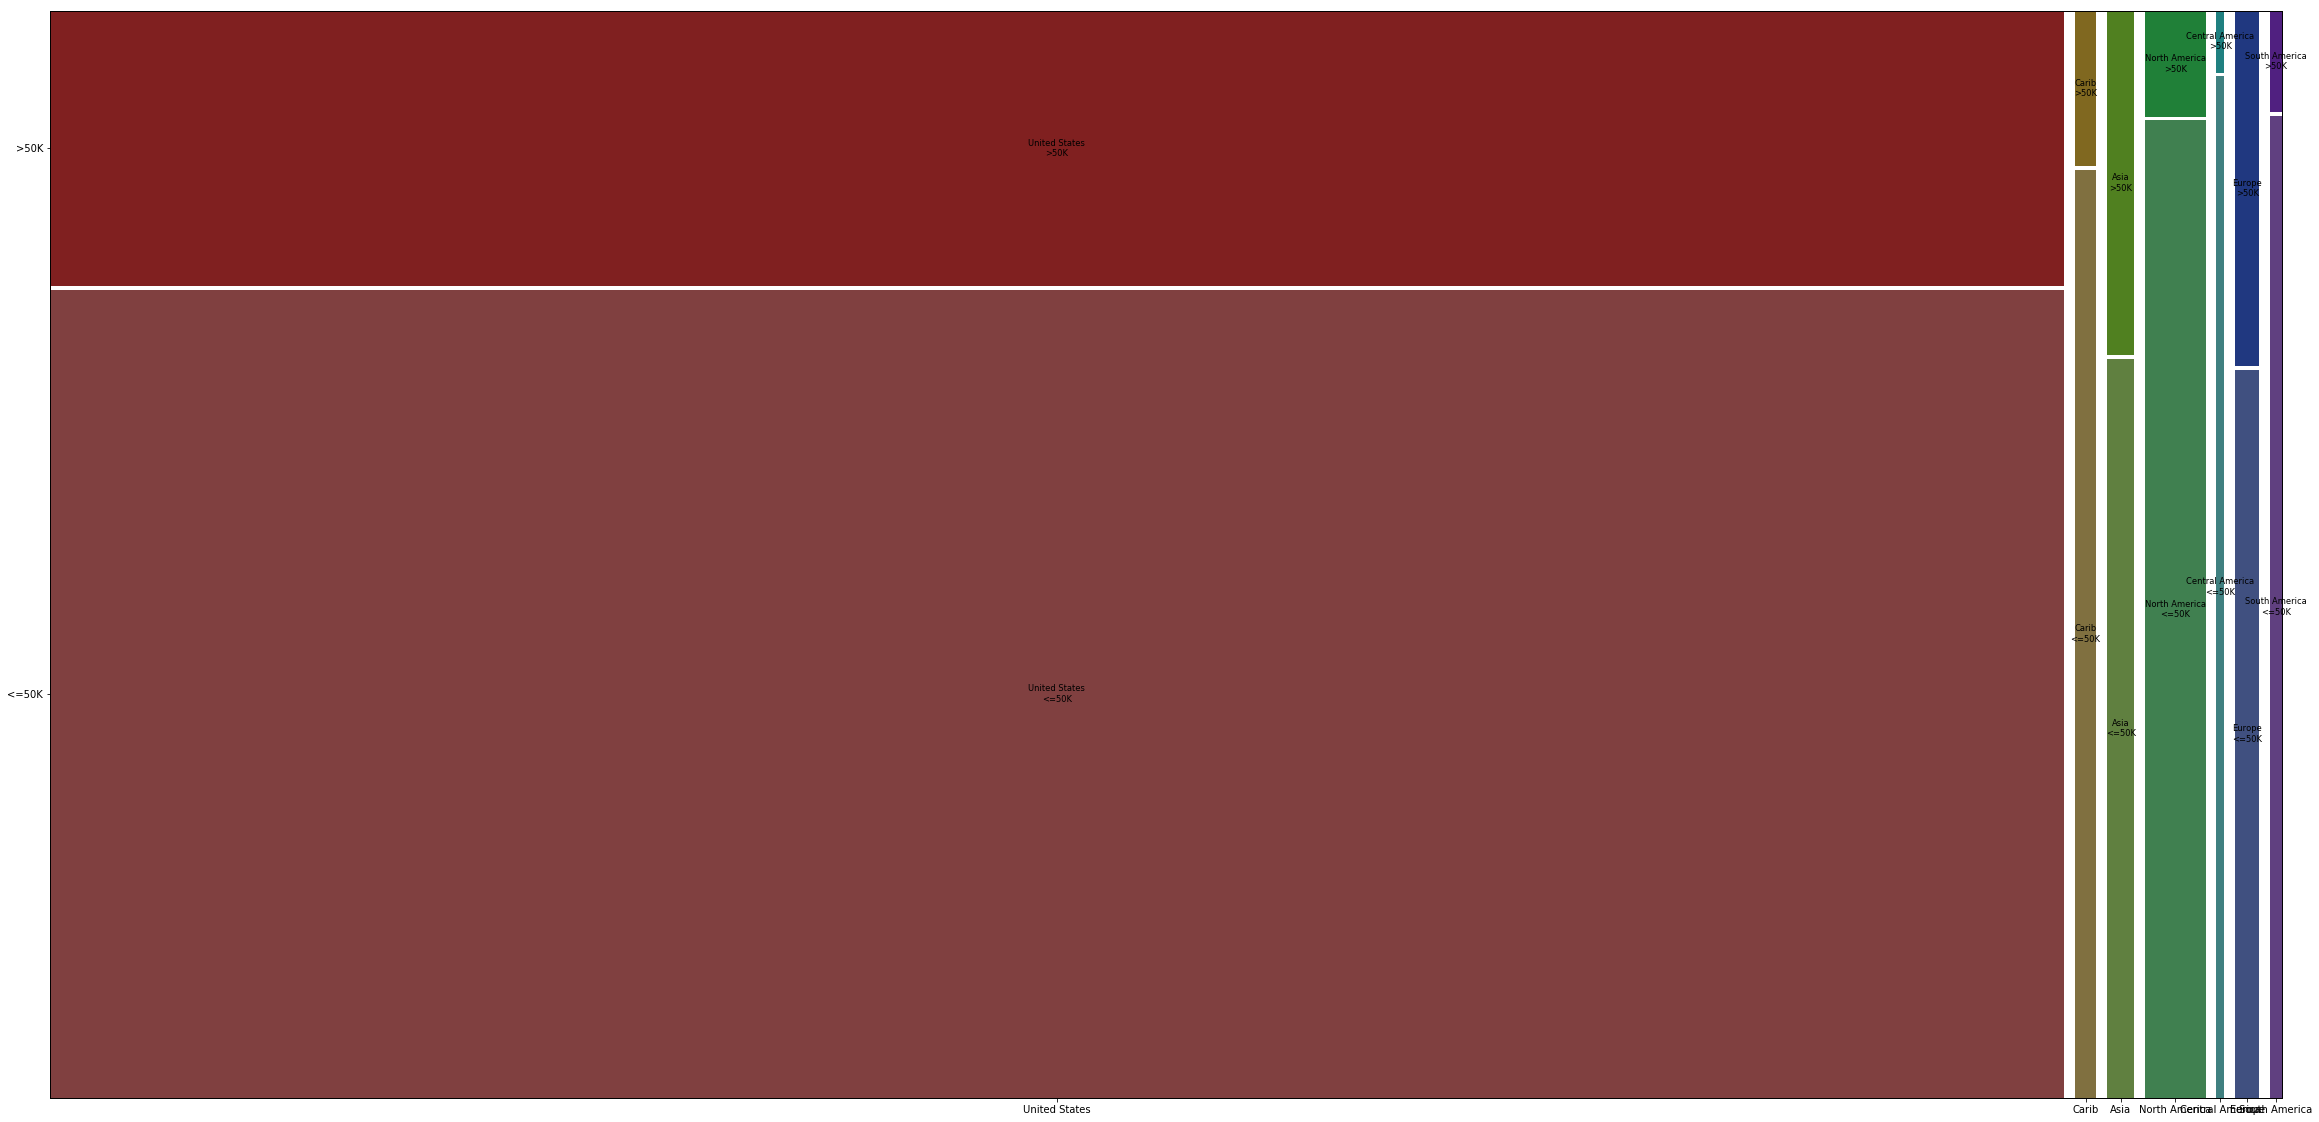

origin_descent_us


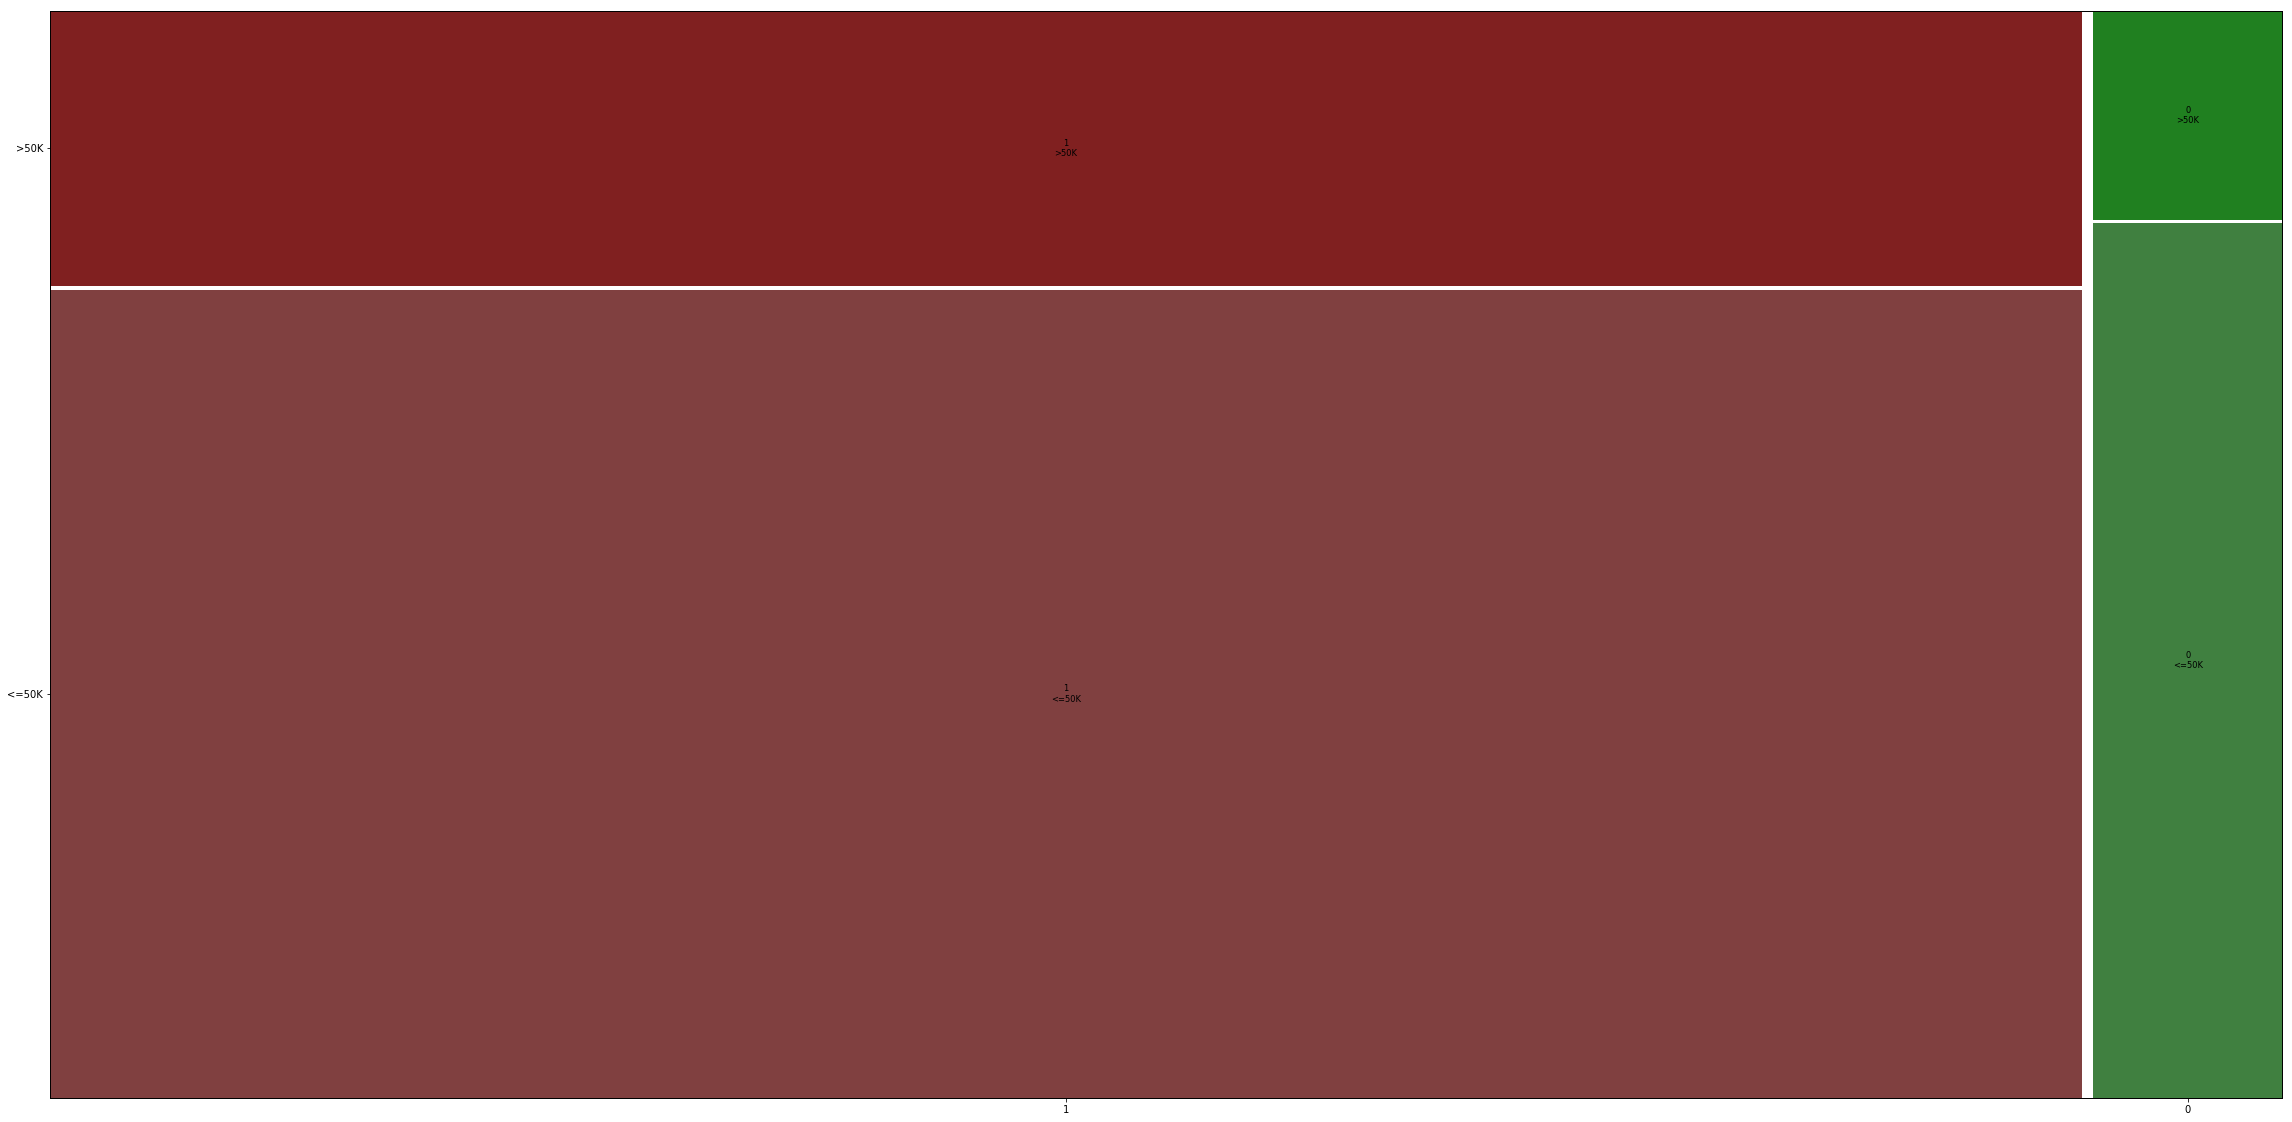

level_of_employ


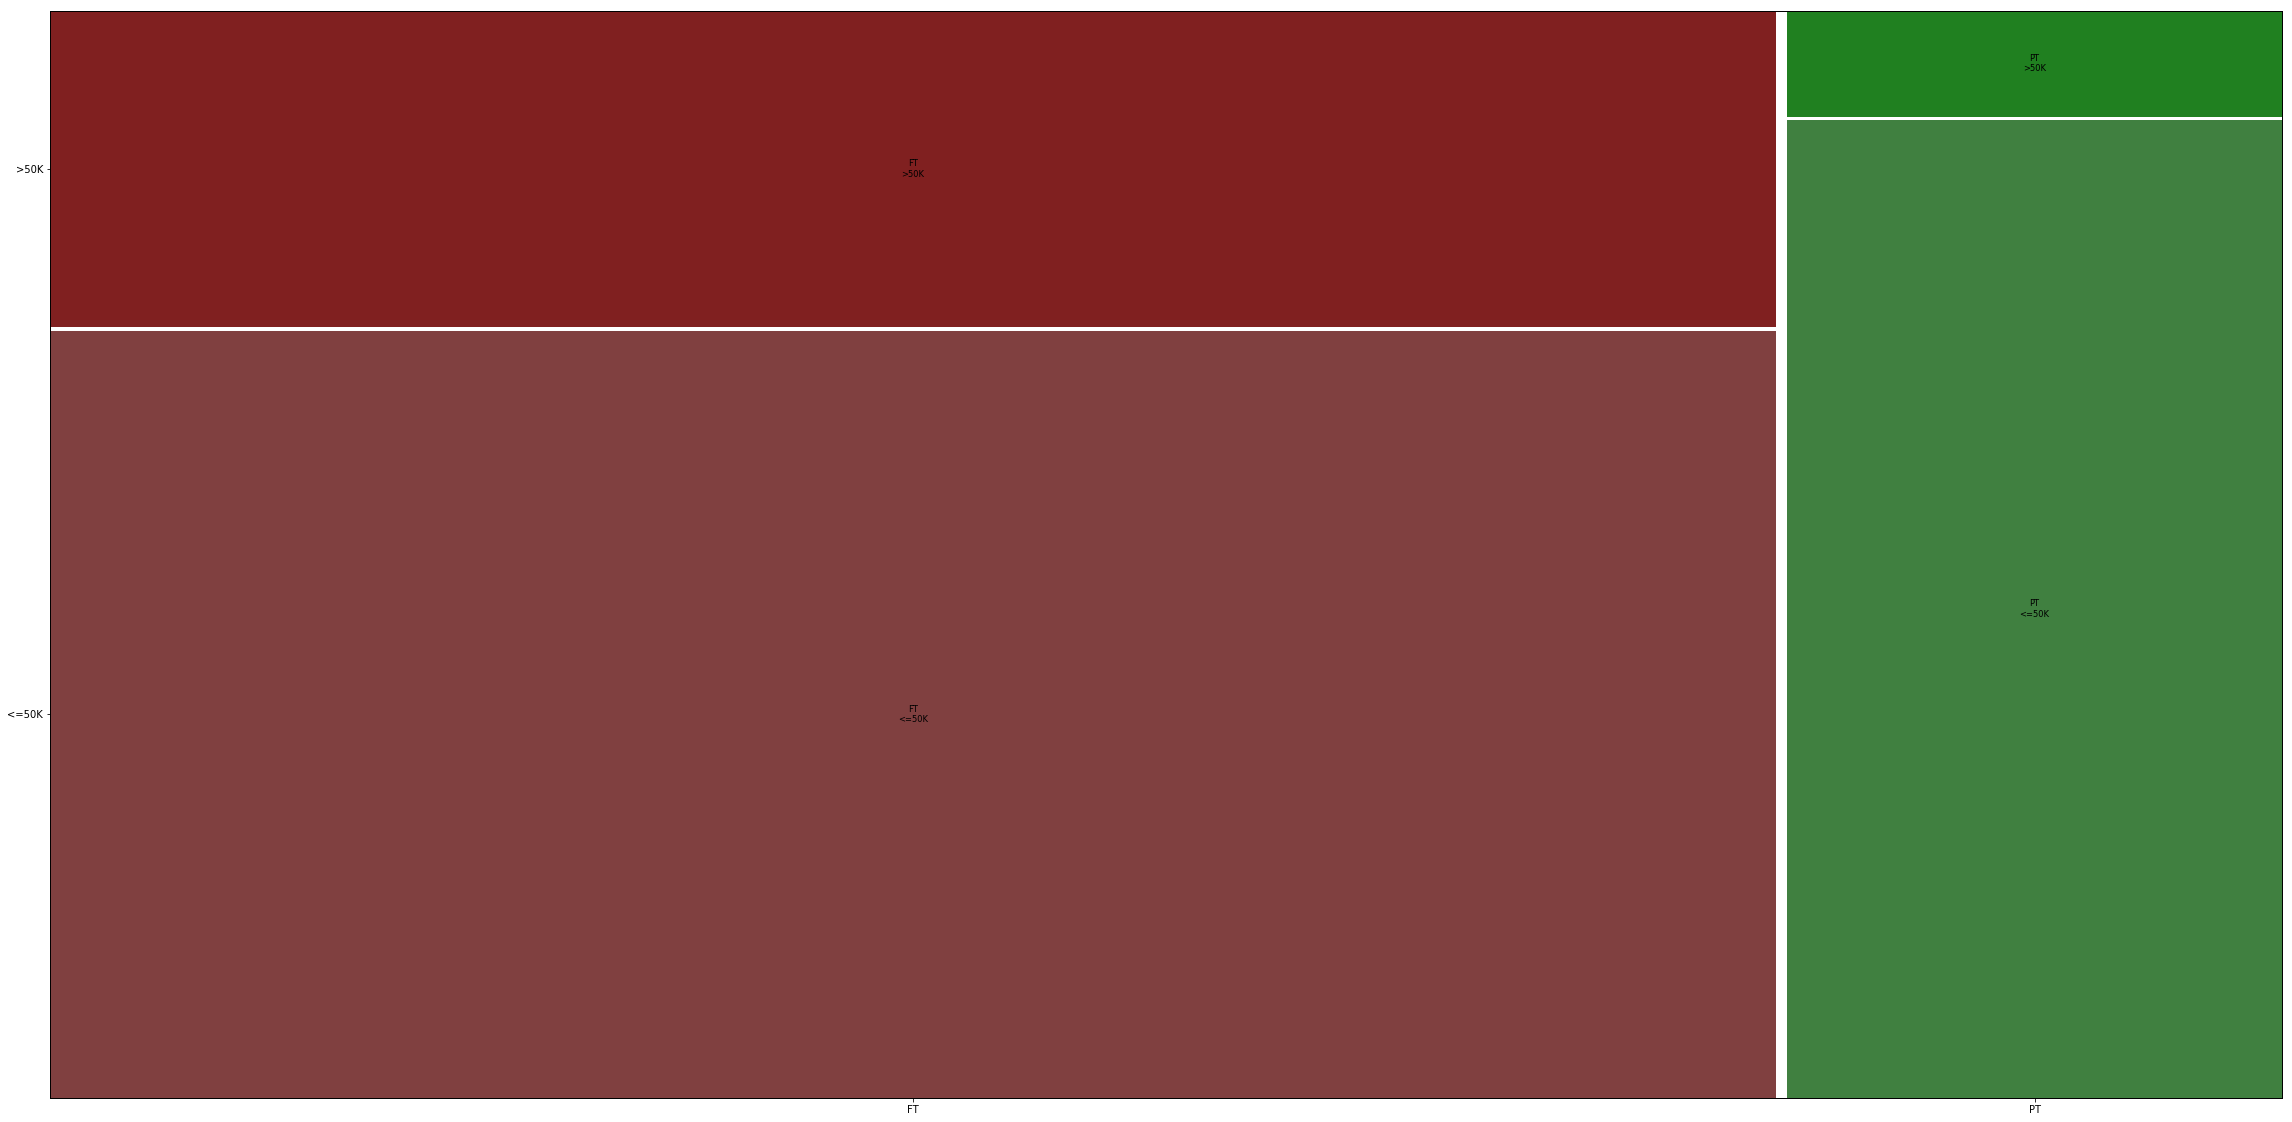

age_range


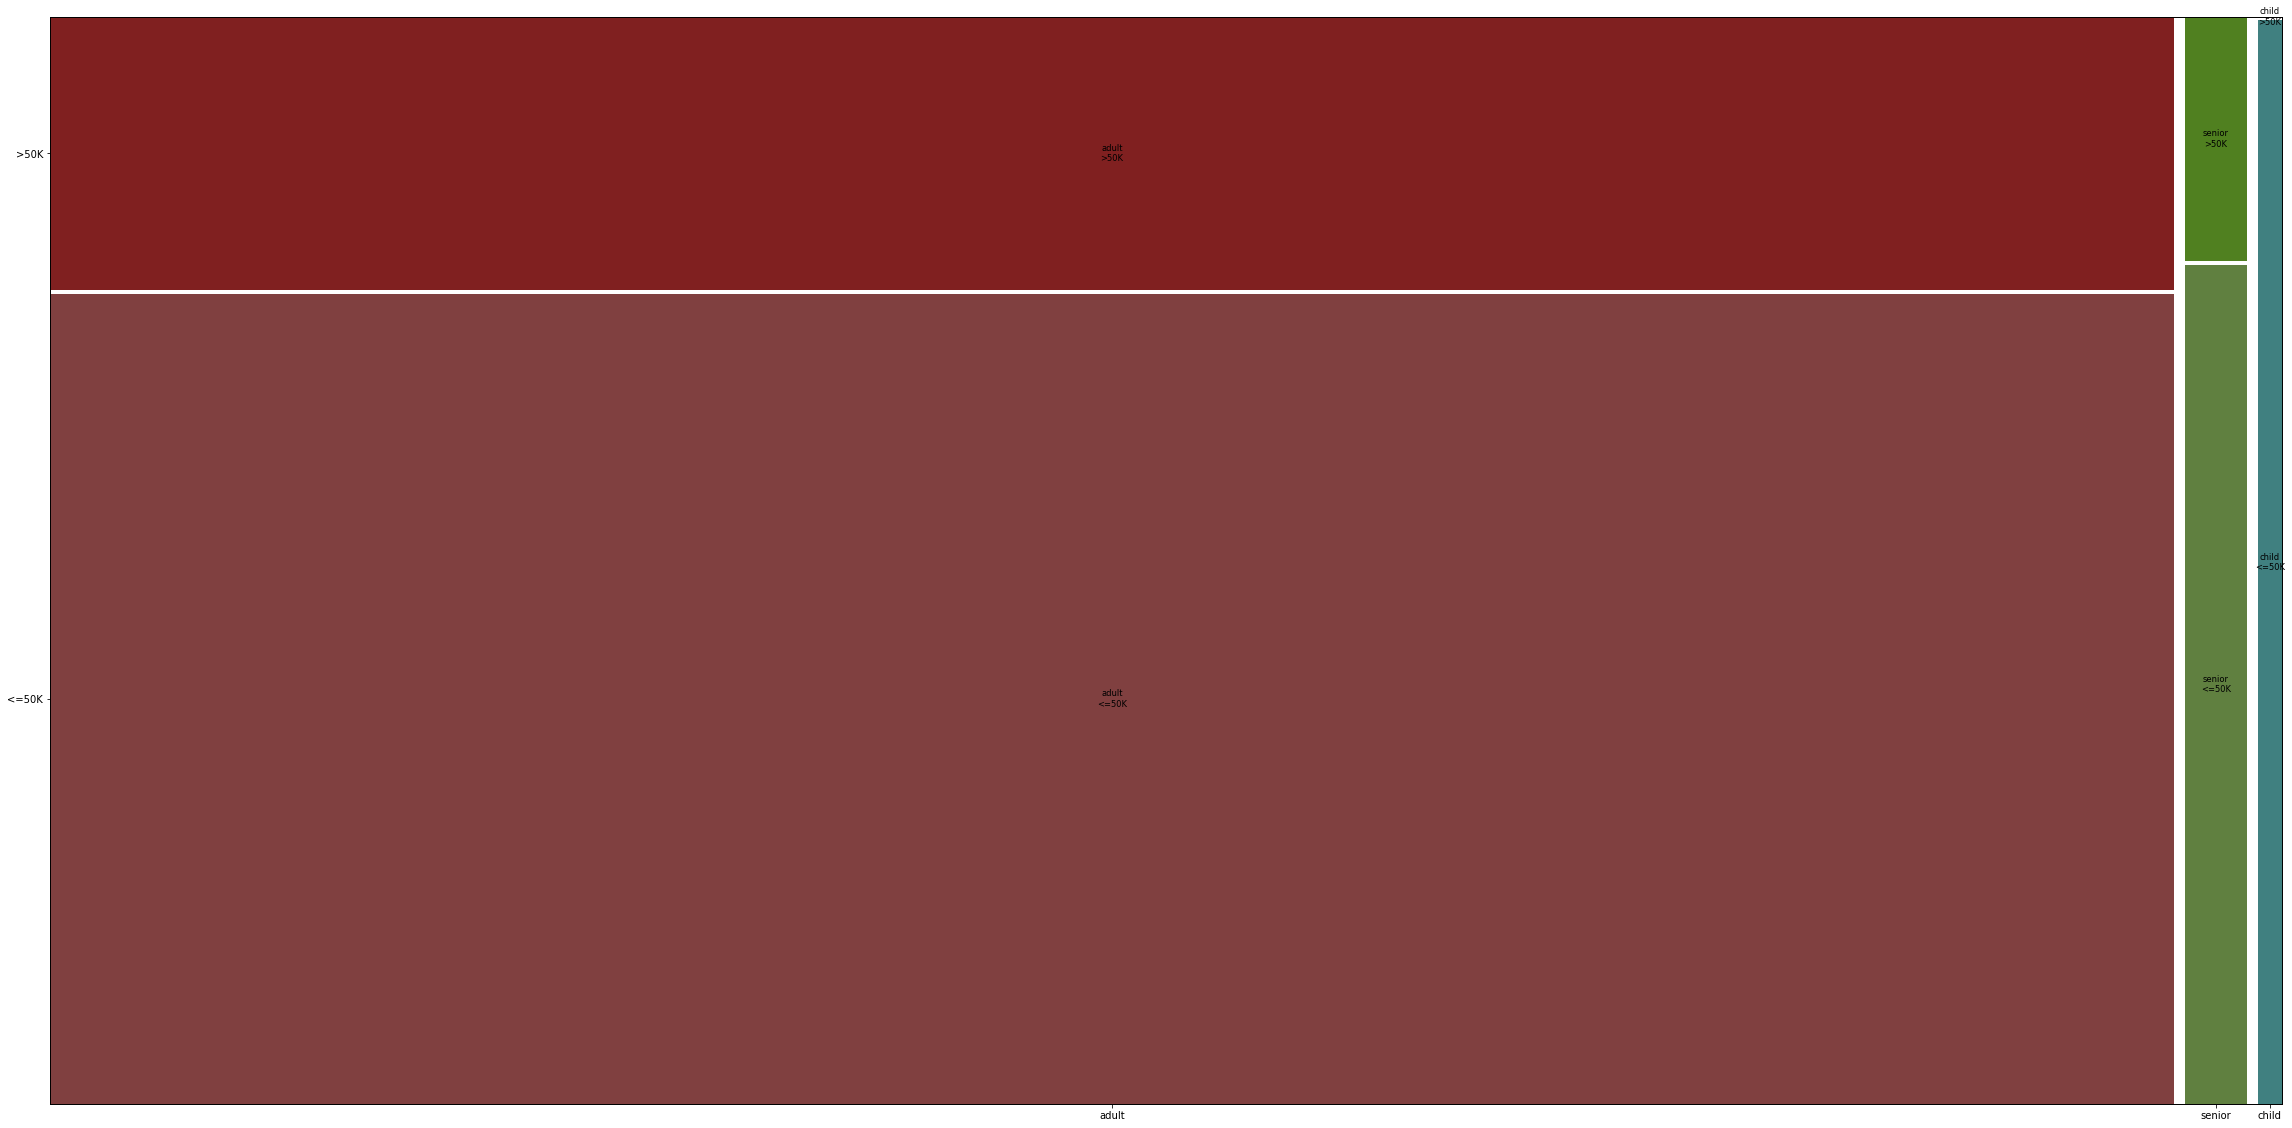

education_level


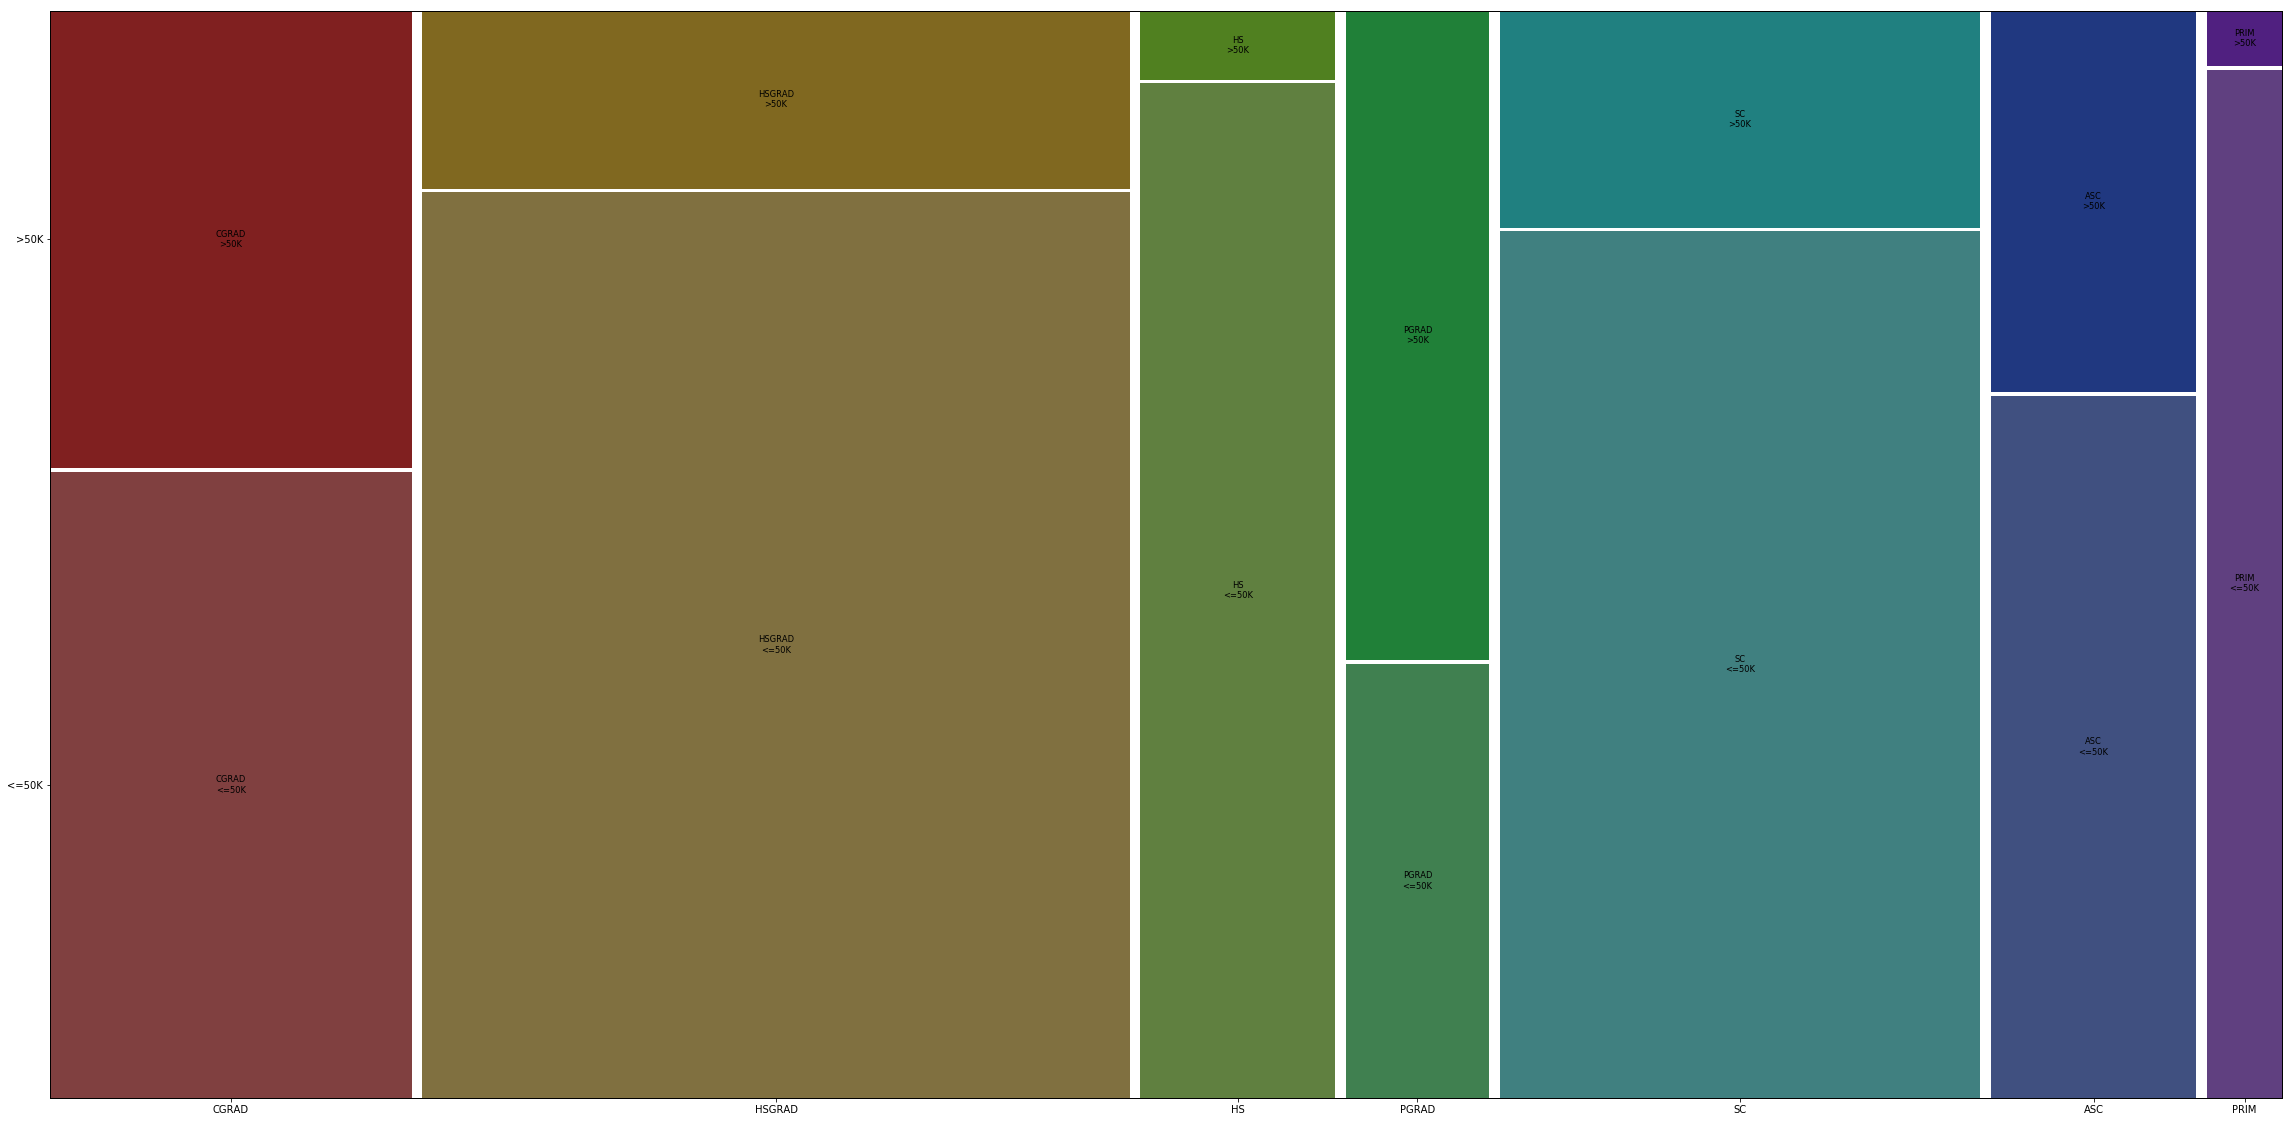

In [42]:
#https://www.statsmodels.org/stable/generated/statsmodels.graphics.mosaicplot.mosaic.html
#https://stackoverflow.com/questions/28517276/changing-fig-size-with-statsmodel -- cel's answer 
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import matplotlib as mpl

mosaic_vars = catagorical_vars

target_var = 'annual_income'
for var in mosaic_vars:
    
    n, m = 40, 20

    with mpl.rc_context():
        mpl.rc("figure", figsize=(n,m))
        
        print(var)
    
        mosaic(raw_census_95_data,[str(var), target_var], horizontal = True, gap = 0.005)

        plt.show()

In [43]:
continous_features = list(raw_census_95_data.select_dtypes(include='int64').columns)

print(continous_features) 

['age', 'fnlwght', 'education_num_yr', 'cap_gain', 'cap_loss', 'hours_per_week']


https://github.com/jakemdrew/DataMiningNotebooks 
notebook 2 

In [44]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

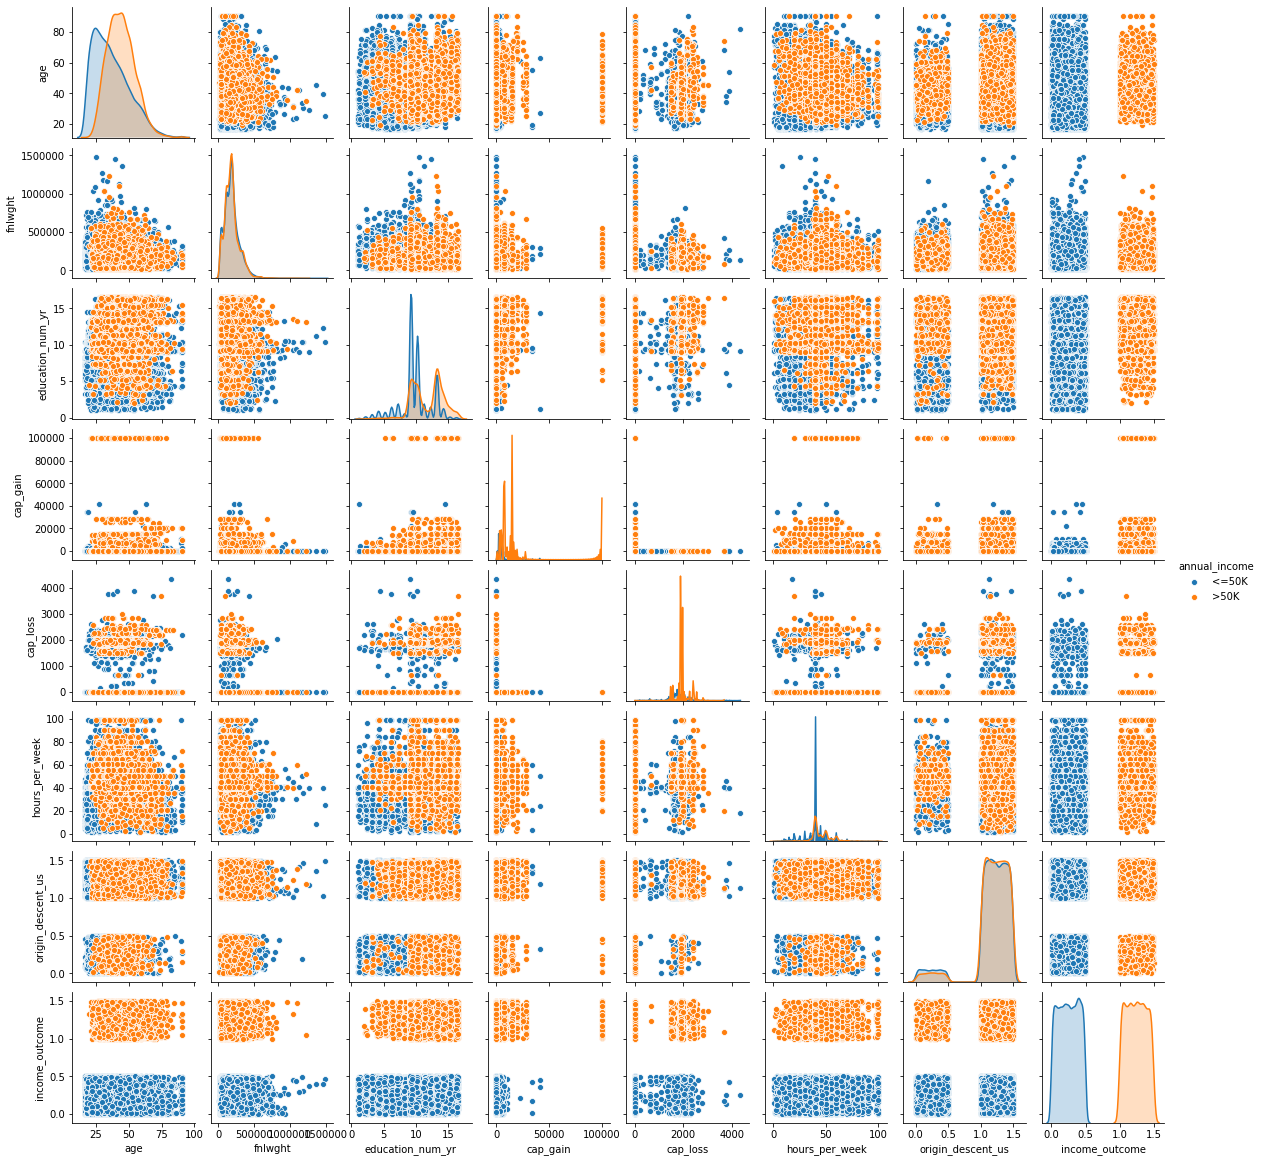

In [45]:
continous_feat_jitter = raw_census_95_data.copy()
continous_feat_jitter['origin_descent_us'] = continous_feat_jitter.origin_descent_us.astype('int64')
continous_feat_jitter['income_outcome'] = continous_feat_jitter.income_outcome.astype('int64')
continous_features_jitter = list(continous_feat_jitter.select_dtypes(include='int64').columns)
continous_feat_jitter[continous_features_jitter] = continous_feat_jitter[continous_features_jitter].values + np.random.rand(len(continous_feat_jitter),8)/2 
sns.pairplot(continous_feat_jitter,hue = 'annual_income', height=2)

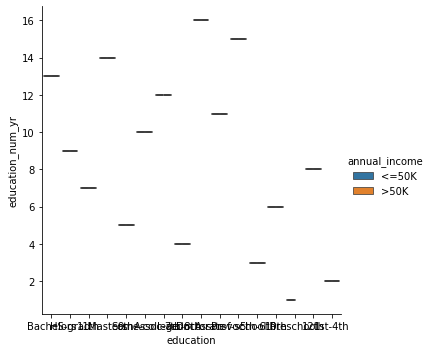

In [46]:
#https://seaborn.pydata.org/tutorial/categorical.html
n, m = 100, 100

with mpl.rc_context():
    mpl.rc("figure", figsize=(n,m))
    sns.catplot(x="education", y="education_num_yr", kind='box', hue = 'annual_income', data=raw_census_95_data)
    plt.show()


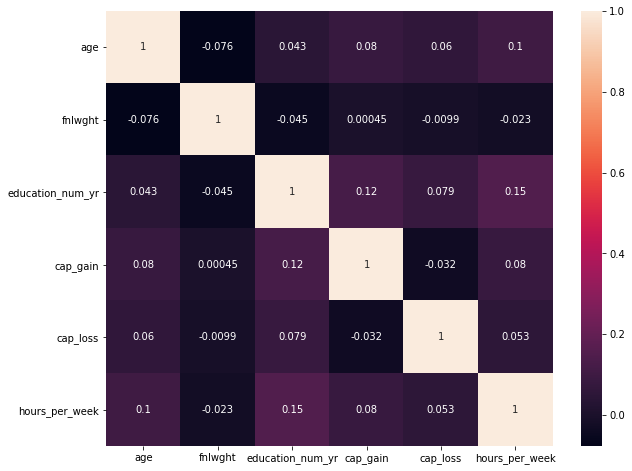

In [47]:
# This heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,8]
sns.heatmap(raw_census_95_data.corr(), annot = True);

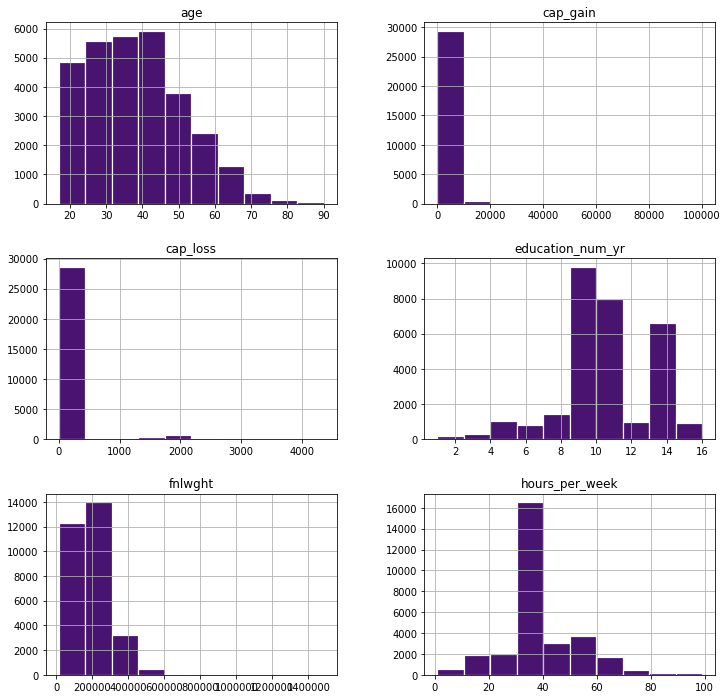

In [48]:
# Distribution of Different Features of the Dataset
distribution = raw_census_95_data.hist( color='#481470', linewidth = 1.2, edgecolor = 'white')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Going back to our original data set, we see our continous variables are not on the same scale, let's normalize before proceeding with PCA, otherwise we risk the FNLWGHT feature comprising most of the variance as it has large min and max values compared to age and capital gains and loss. 

In [49]:
continous_features_df = raw_census_95_data.copy()
continous_features_df.dtypes
continous_features_df['origin_descent_us'] = continous_features_df.origin_descent_us.astype('int64')
continous_features_df['income_outcome'] = continous_features_df.income_outcome.astype('int64')
continous_features_df_list  = list(continous_features_df.select_dtypes(include='int64').columns)
continous_features_df_list.remove('income_outcome')

In [50]:
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA


RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = continous_features_df[continous_features_df_list], continous_features_df.income_outcome

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)


# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2))
std_clf.fit(X_train, y_train)

pca_std = std_clf.named_steps['pca']

scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

#print(pca_std.components_)

In [51]:
continous_features_df[continous_features_df_list].columns

Index(['age', 'fnlwght', 'education_num_yr', 'cap_gain', 'cap_loss',
       'hours_per_week', 'origin_descent_us'],
      dtype='object')

https://github.com/jakemdrew/DataMiningNotebooks notebook 3

We see even after scaling the continous features, we do not have clear seperation between those who make less than 50K (black dots) and those who make more than 50K (white dots) in the training data set. And there is clear bleed over between the classes. We could generate a more balanced data set through upsampling, but we will run the risk of overfitting the principal components to the training data set. We will want to build models that will include the categorical features.

In [52]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

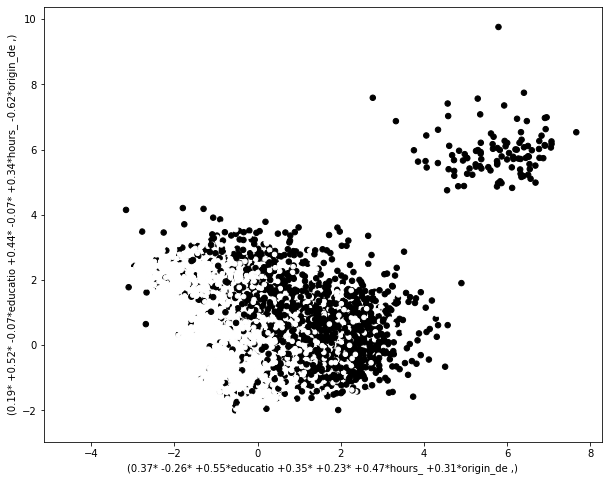

<Figure size 720x576 with 0 Axes>

In [53]:
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:-8])
        tmp_array.append(tmp_string)
    return tmp_array
  

pca_weight_strings = get_feature_names_from_weights(pca_std.components_,continous_features_df[continous_features_df_list].columns) 



df_pca = pd.DataFrame(X_train_std_transformed,columns=[pca_weight_strings])


ax = df_pca.plot.scatter(df_pca.columns.values[0], df_pca.columns.values[1], c=y_train, s=(y_train+2)*10)
newfig = plt.figure()


We see from the mosiac plots, the following catagorical features have the largest shifts in proportion of those who make 50K and those who make less than 50K

workclass, martial_status,education,occupation, sex,origin_descent, level_of_employ

In [54]:
sk_learn_data_set = raw_census_95_data.copy()
sk_learn_data_set['income_outcome'] = sk_learn_data_set.income_outcome.astype('int64')
sk_learn_data_set.dtypes

age                   int64
workclass            object
fnlwght               int64
education            object
education_num_yr      int64
marital_status       object
occupation           object
relationship         object
race                 object
sex                  object
cap_gain              int64
cap_loss              int64
hours_per_week        int64
native_country       object
annual_income        object
origin_descent       object
origin_descent_us    object
income_outcome        int64
level_of_employ      object
age_range            object
education_level      object
dtype: object

In [55]:
features_of_interest = ['workclass', 'marital_status','occupation', 'relationship', 'sex','origin_descent_us', 'level_of_employ', 'education_level']


https://github.com/jakemdrew/DataMiningNotebooks notebook 4
https://stackoverflow.com/questions/48810726/concatenate-pandas-dataframes-generated-with-a-loop
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [56]:
tmp_cont = []
for feat in features_of_interest: 
    tmp_df = pd.get_dummies(sk_learn_data_set[feat],prefix=str(feat))
    tmp_cont.append(tmp_df)
    feat_df = pd.concat(tmp_cont,axis=1)

ml_df = pd.concat([sk_learn_data_set,feat_df], axis=1)

ml_df.dtypes.unique()


array([dtype('int64'), dtype('O'), dtype('uint8')], dtype=object)

In [57]:
ml_df = ml_df.select_dtypes(include=['int64','uint8'])

In [58]:
list(ml_df.columns.unique())


['age',
 'fnlwght',
 'education_num_yr',
 'cap_gain',
 'cap_loss',
 'hours_per_week',
 'income_outcome',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'marital_status_Divorced',
 'marital_status_Married-AF-spouse',
 'marital_status_Married-civ-spouse',
 'marital_status_Married-spouse-absent',
 'marital_status_Never-married',
 'marital_status_Separated',
 'marital_status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'relationship_Husband',
 'relationship_Not-in-family',
 'relationsh

In [59]:
ml_df.head(n=5)

,age,fnlwght,education_num_yr,cap_gain,cap_loss,hours_per_week,income_outcome,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,origin_descent_us_1,level_of_employ_FT,level_of_employ_PT,education_level_ASC,education_level_CGRAD,education_level_HS,education_level_HSGRAD,education_level_PGRAD,education_level_PRIM,education_level_SC
0,39,77516,13,2174,0,40,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,1,1,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,1,1,0,0,0,1,0,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [60]:
ml_df.dtypes

age                                     int64
fnlwght                                 int64
education_num_yr                        int64
cap_gain                                int64
cap_loss                                int64
hours_per_week                          int64
income_outcome                          int64
workclass_Federal-gov                   uint8
workclass_Local-gov                     uint8
workclass_Private                       uint8
workclass_Self-emp-inc                  uint8
workclass_Self-emp-not-inc              uint8
workclass_State-gov                     uint8
workclass_Without-pay                   uint8
marital_status_Divorced                 uint8
marital_status_Married-AF-spouse        uint8
marital_status_Married-civ-spouse       uint8
marital_status_Married-spouse-absent    uint8
marital_status_Never-married            uint8
marital_status_Separated                uint8
marital_status_Widowed                  uint8
occupation_Adm-clerical           

https://github.com/jakemdrew/DataMiningNotebooks notebook 4

In [61]:
from sklearn.model_selection import ShuffleSplit

ML_std_clf = StandardScaler()
if 'income_outcome' in ml_df:
    y = ml_df['income_outcome'].values 
    del ml_df['income_outcome'] 
    X = ml_df.values 
    
ML_std_clf.fit(X,y)


num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [62]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.8058187863674148
confusion matrix
 [[4415  144]
 [1024  432]]
====Iteration 1  ====
accuracy 0.7847049044056525
confusion matrix
 [[4333  167]
 [1128  387]]
====Iteration 2  ====
accuracy 0.7911886949293433
confusion matrix
 [[4346  168]
 [1088  413]]
